<a href="https://colab.research.google.com/github/JuanMelendres/proyecto_integrador_equipo19/blob/master/Avance3_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Avance 3. Baseline

##Optimización de flujos quirúrgicos mediante IA

###Oscar Damián Vela Noyola A00821831
###Juan Antonio Melendres Villa A00369017
###Miguel Ángel Villanueva Amador A01793890


#### ¿Qué algoritmo (individual, NO ensambles) se puede utilizar como baseline para predecir las variables objetivo?

Para abordar este problema de clasificación multiclase, donde la variable objetivo toma valores discretos (1, 2, 3), se seleccionó el algoritmo de Máquinas de Soporte Vectorial (**SVM**). Este modelo es adecuado por varias razones clave relacionadas con el tipo de datos, la cantidad de datos, la relevancia de las características, y la interpretabilidad del modelo.

Este modelo es apropiado porque:

  * Manejo de datos estructurados: **SVM** es eficaz para problemas con datos estructurados, que en este caso están organizados en formato tabular y permiten la separación de clases mediante la construcción de un hiperplano en un espacio de mayor dimensión.

  * Cantidad de datos: **SVM** es particularmente útil cuando se trabaja con tamaños de dataset moderados, y es especialmente eficaz cuando el número de características es elevado en comparación con el número de instancias, lo que es común en muchos problemas de clasificación.

  * Relevancia de las características: **SVM** puede aprovechar características relevantes, incluso si las clases no son linealmente separables, mediante el uso de kernels como el RBF (Radial Basis Function). Esto permite transformar el espacio de características, logrando una mejor separación entre clases.

  * Interpretabilidad: Aunque **SVM** no es tan interpretable como la regresión logística, puede ofrecer información sobre los puntos de soporte, que son los ejemplos más importantes cercanos al margen de decisión entre clases. Sin embargo, para un análisis más interpretativo, puede ser útil combinar **SVM** con modelos como la regresión logística.

  * Clasificación precisa: **SVM** es conocido por ofrecer alta precisión, especialmente en problemas complejos de clasificación en alta dimensionalidad. Esto lo hace un candidato robusto para problemas donde la relación entre características y clases es complicada.

  * Versatilidad en multiclase: Aunque originalmente **SVM** fue diseñado para problemas binarios, puede extenderse a problemas multiclase utilizando enfoques como "one-vs-rest" o "one-vs-one", adaptándose al problema que nos ocupa (1, 2, 3).

Algunos otros algoritmos individuales que también pueden servir como baseline en problemas de clasificación multiclase incluyen:

* Árboles de decisión
* Naive Bayes
* KNeighborsClassifier
* MLPClassifier
* Regresión Logística

#### Librerías

Importamos las librerias que se llegaran a necesitar

In [ ]:
# --- Importaciones esenciales para análisis de datos y visualización ---
import pandas as pd  # Manipulación y análisis eficiente de datos tabulares
import matplotlib.pyplot as plt  # Creación de gráficos personalizados
import seaborn as sns  # Visualización estadística avanzada basada en matplotlib
import numpy as np  # Operaciones matemáticas avanzadas y manejo eficiente de arrays

# --- Modelos de clasificación y evaluación ---
from sklearn.svm import SVC  # Máquina de soporte vectorial (SVM) para clasificación
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix # Métricas de evaluación para modelos de clasificación
from sklearn.model_selection import cross_val_score, train_test_split  # División de datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import learning_curve  # Curvas de aprendizaje para evaluar rendimiento del modelo
from sklearn.ensemble import RandomForestClassifier  # Algoritmo de regresión basado en árboles de decisión

# --- Gestión de advertencias ---
import warnings  # Control de advertencias
warnings.filterwarnings('ignore')  # Supresión de todas las advertencias para evitar ruido en la salida


#### Cargar set de datos original

Cargamos el data set original

In [ ]:
# Load the data from the first sheet, and assign it to variable "df"
df = pd.read_excel('variables_quirurgicas_finales.xlsx')
# Show the first 10 rows using dataframe.head() method
df.head(10)

,edad_n,peso_yj_n,tallacm_n,imc_yj_n,hto_yj_n,leucostotales_yj_n,neutrofilos_yj_n,tp_yj_n,ttp_yj_n,glucosa_yj_n,...,qsanormal,sexo_binary,anestesia_2,anestesia_3,anestesia_4,anestesia_5,nitritos_binary,egoinfeccin_binary,egoanormal_binary,riesgo_quirurgico
0,-0.302744,0.135252,0.293533,0.266600,-0.031104,0.309829,0.013707,0.385542,0.208330,0.573646,...,0,1,1,0,0,0,0,0,1,1
1,-0.969248,0.022076,-0.057890,0.266600,-0.071345,0.614379,0.637991,0.176659,0.174646,0.521957,...,1,0,0,0,0,0,0,0,0,2
2,0.190040,-0.009149,-0.057890,0.237438,-0.319087,0.020478,0.051430,0.163757,-0.087805,0.569326,...,1,0,0,0,0,0,0,0,0,3
3,-0.380527,0.148237,-0.163066,0.413111,-0.251789,0.171215,0.026994,0.237176,0.067576,0.494980,...,0,0,0,0,0,0,0,0,0,2
4,-0.075975,0.173521,-0.022805,0.394822,0.108825,0.160273,-0.262229,0.176659,0.081984,0.551329,...,0,1,0,0,0,0,0,0,0,2
5,-0.733886,0.094835,-0.057890,0.333700,-0.378056,0.769683,0.871388,0.441306,0.040554,0.644456,...,1,1,0,0,0,0,0,0,0,2
6,0.537220,0.135252,0.293533,0.266600,-0.509317,0.413679,0.159186,0.426109,-0.046407,0.598190,...,1,1,0,0,0,0,0,0,0,2
7,0.446171,0.155917,-0.512783,0.522450,-0.231825,-0.025226,-0.373878,0.340914,0.109591,0.551329,...,1,0,1,0,0,0,0,0,0,1
8,-0.075975,0.348392,-0.268124,0.613328,-0.364744,0.469807,0.386854,0.201643,-0.050048,0.425665,...,1,0,0,0,0,0,0,0,0,1
9,-0.302744,-0.009149,-0.057890,0.237438,0.153807,0.636566,0.732157,0.281218,0.008765,0.617010,...,1,0,0,0,0,0,0,0,0,2


In [ ]:
df.shape[0] # CANTIDAD DE RENGLONES

2115

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
edad_n,2115.0,-0.127024,0.457861,-1.0,-0.486215,-0.100728,0.237284,1.0
peso_yj_n,2115.0,0.133587,0.186980,-1.0,0.021311,0.135252,0.244369,1.0
tallacm_n,2115.0,0.012616,0.305275,-1.0,-0.198099,0.012130,0.258334,1.0
imc_yj_n,2115.0,0.348267,0.156131,-1.0,0.260734,0.343994,0.429979,1.0
hto_yj_n,2115.0,-0.177524,0.294491,-1.0,-0.355771,-0.175204,0.022230,1.0
leucostotales_yj_n,2115.0,0.309644,0.221456,-1.0,0.160273,0.301846,0.442836,1.0
neutrofilos_yj_n,2115.0,0.169872,0.315254,-1.0,-0.043523,0.141102,0.363543,1.0
tp_yj_n,2115.0,0.258404,0.158322,-1.0,0.176659,0.259652,0.340914,1.0
ttp_yj_n,2115.0,0.000896,0.112582,-1.0,-0.050048,0.005477,0.058728,1.0
glucosa_yj_n,2115.0,0.574889,0.110525,-1.0,0.516756,0.560475,0.617010,1.0


### Variables finales

In [ ]:
num_vars_entrada = ["edad_n", "peso_yj_n", "tallacm_n", "imc_yj_n", "hto_yj_n","leucostotales_yj_n", "neutrofilos_yj_n", "tp_yj_n", "ttp_yj_n", "glucosa_yj_n", "bun_yj_n",
            "creatinina_yj_n", "sodio_yj_n", "potasio_yj_n"]

binary_vars_entrada = ["Diabetes Mellitus (DM)", "Hipertensión (HTA)",
               "Ante_IAM", "ante_arritmia", "otrosantecedentesimportantes",
               "cirugaprevia", "alcoholismo", "tabaquismo", "otros", "valoracion_cardiovascular",
               "primeraqx", "fr_anormal", "plaquetaanormal", "tpanormal", "ttpanormal", "glucosaanormal",
               "creatanormal", "esanormales", "repeticn_examen", "obesidad", "hiperglucemia",
               "bhcanormal", "qsanormal", "sexo_binary", "anestesia_2",
               "anestesia_3", "anestesia_4", "anestesia_5", "nitritos_binary", "egoinfeccin_binary", "egoanormal_binary"]

Variables Numéricas (num_vars_entrada):
Estas variables han sido transformadas y normalizadas, lo que garantiza que los datos tengan una distribución más adecuada y una escala uniforme. Esto es crucial para modelos predictivos como regresión lineal o redes neuronales, que funcionan mejor con datos distribuidos de forma normal y con una magnitud controlada.

Variables Binarias (binary_vars_entrada):
Estas variables capturan características dicotómicas del paciente (por ejemplo, presencia o ausencia de enfermedades o hábitos). Los modelos predictivos suelen utilizar estas variables para hacer clasificaciones o cálculos de probabilidades.

In [ ]:
var_salida = ["riesgo_quirurgico"]

Variable Objetivo:
"riesgo_quirurgico" es la variable de salida que el modelo tratará de predecir o clasificar. Por ejemplo, en un modelo de clasificación, esta variable podría tener valores como:

    1: Riesgo bajo
    2: Riesgo medio
    3: Riesgo alto

Importancia en Modelos Predictivos:
Esta variable se utilizará como referencia durante el entrenamiento del modelo. El objetivo es que, con base en las variables de entrada, el modelo pueda predecir el nivel de riesgo quirúrgico para nuevos pacientes.

#### Caracteristicas

Para realizar una visualización efectiva de la distribución de las características y su relación con la variable de salida (var_salida), podemos emplear diferentes tipos de gráficos. El enfoque general sería:

  * Variables numéricas (num_vars_entrada): Utilizaremos gráficos de distribución (histogramas) y boxplots para mostrar la relación de estas variables con la variable de salida.
  
  * Variables binarias (binary_vars_entrada): Usaremos gráficos de barras para observar la distribución de los valores 0 y 1 y su relación con la variable de salida.
  
  * Variable de salida (var_salida): Dependiendo del tipo de variable (binaria, categórica, continua), visualizaremos cómo varía en función de las variables de entrada.

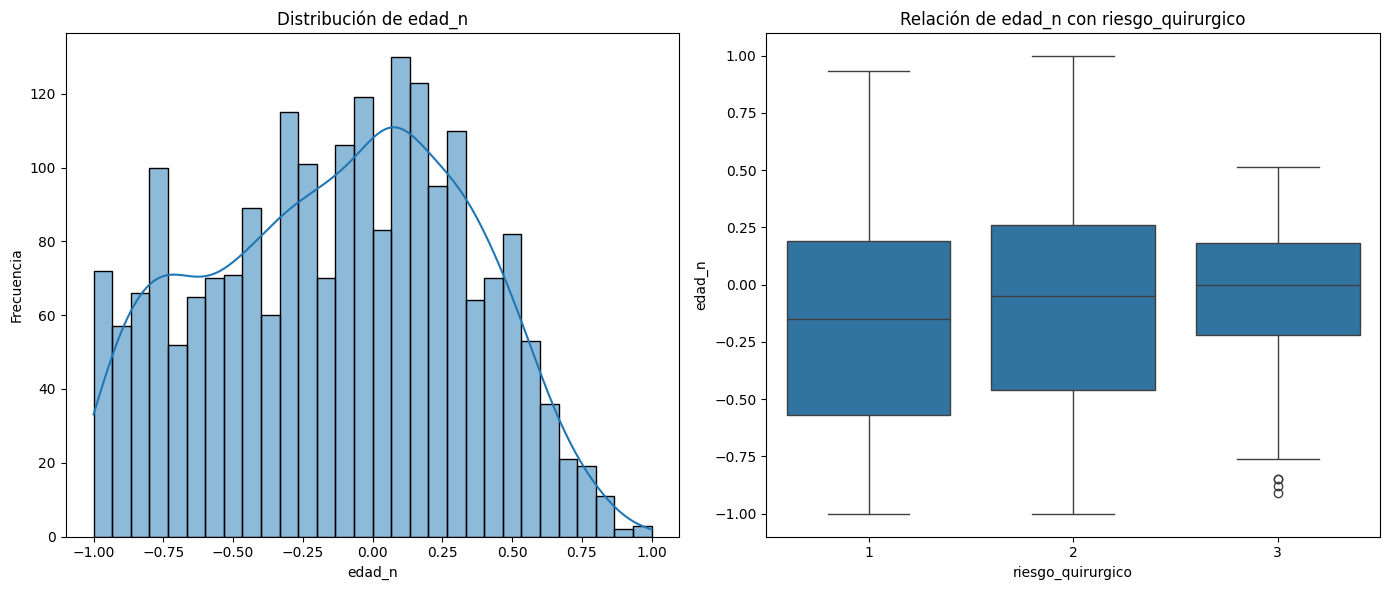

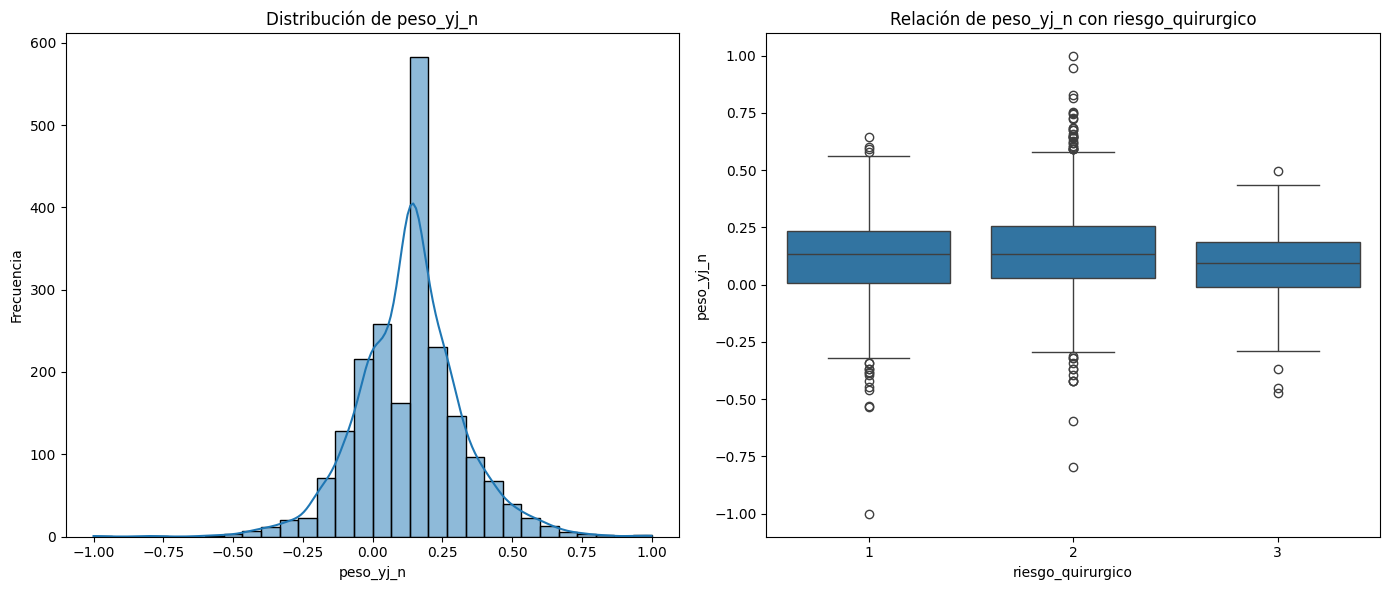

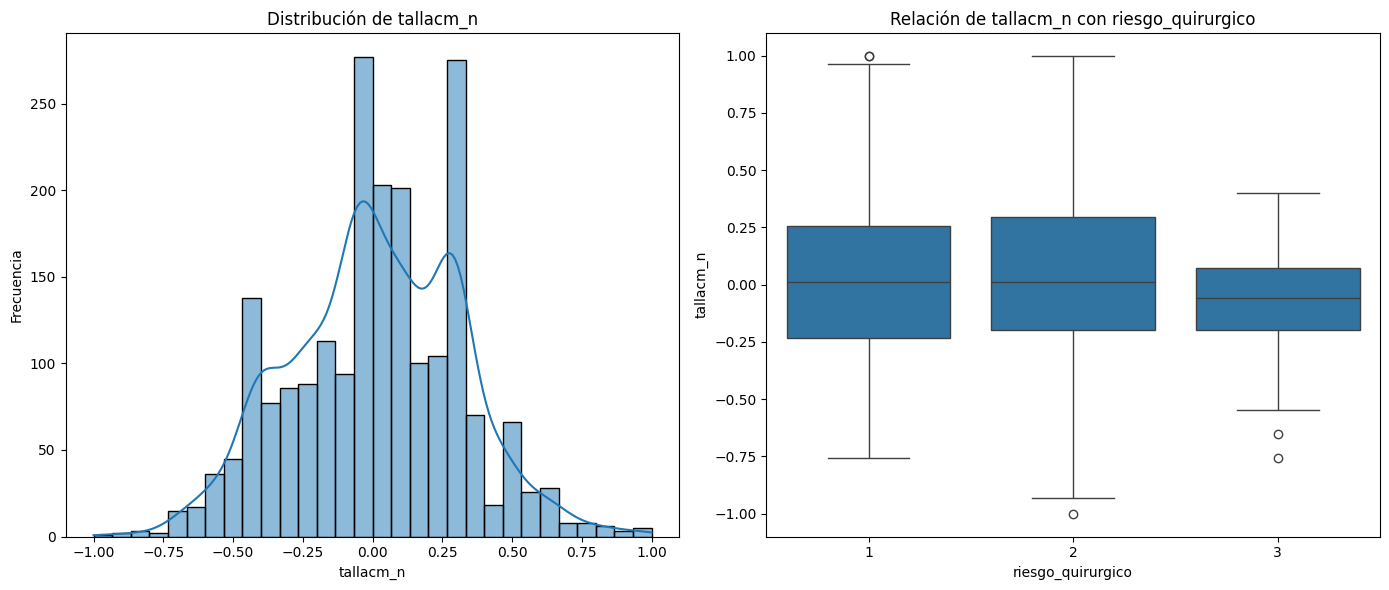

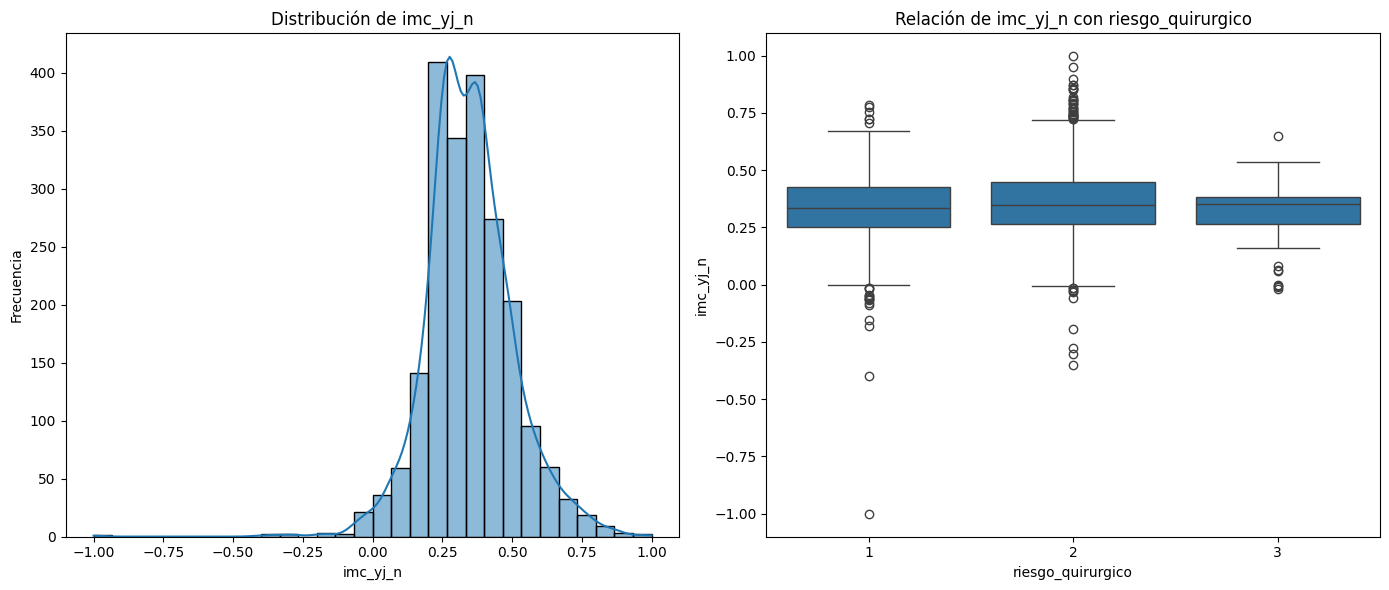

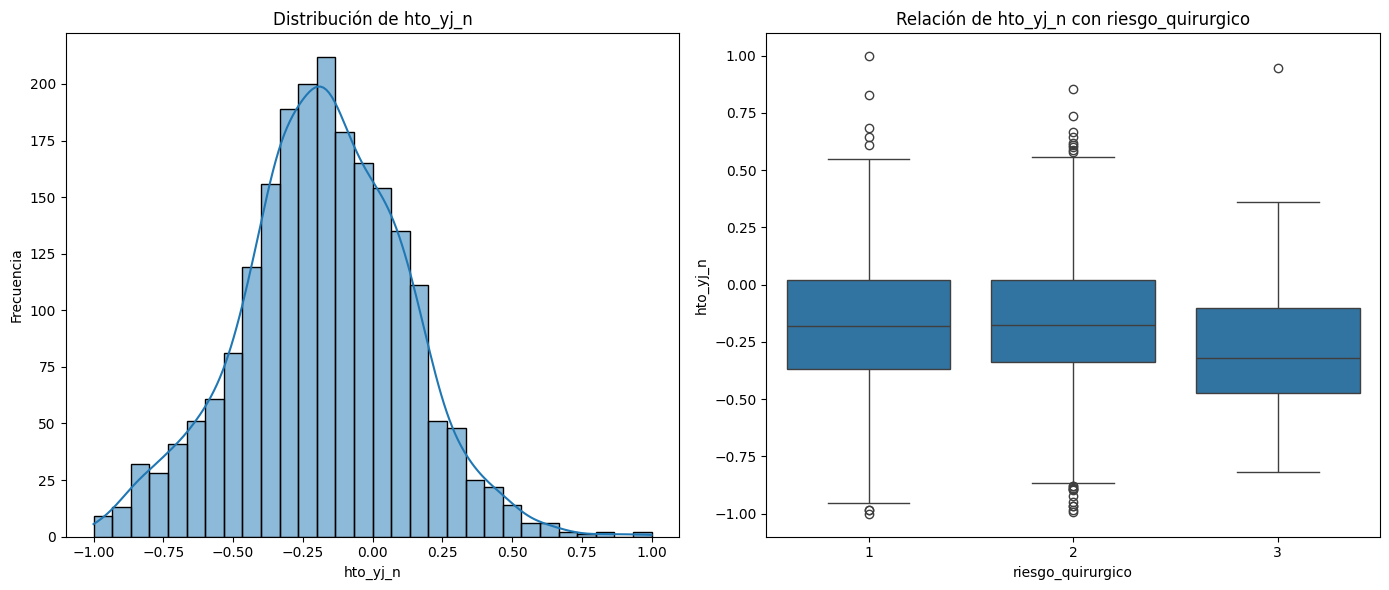

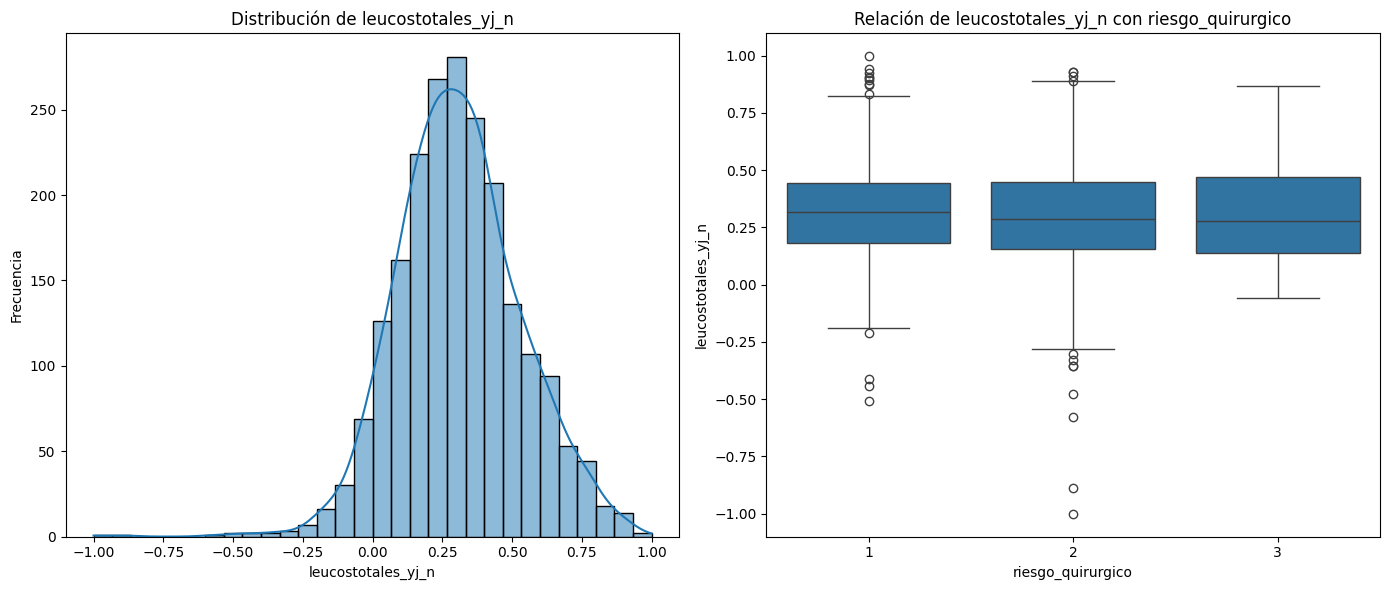

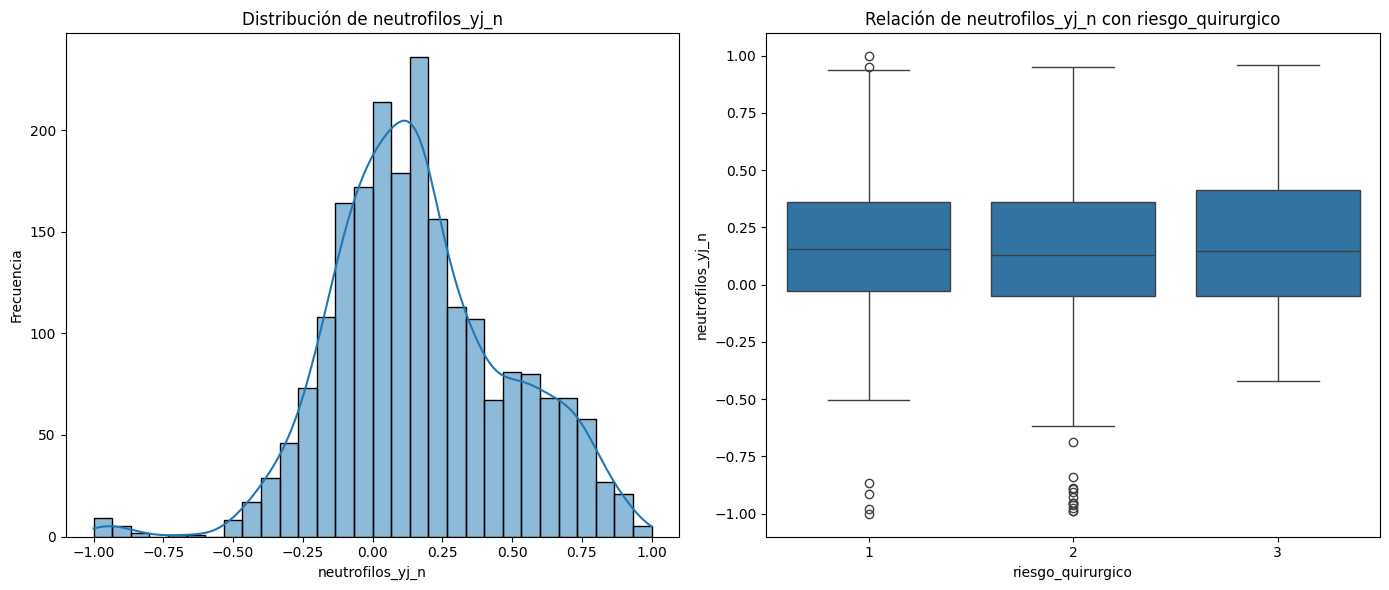

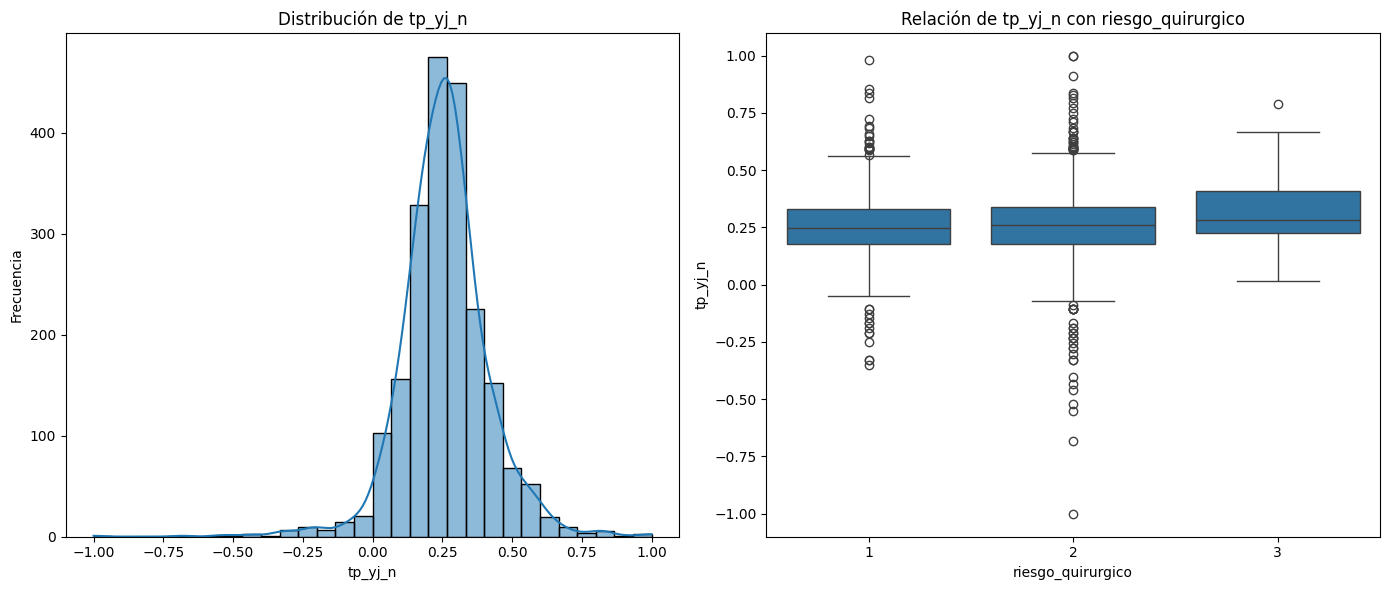

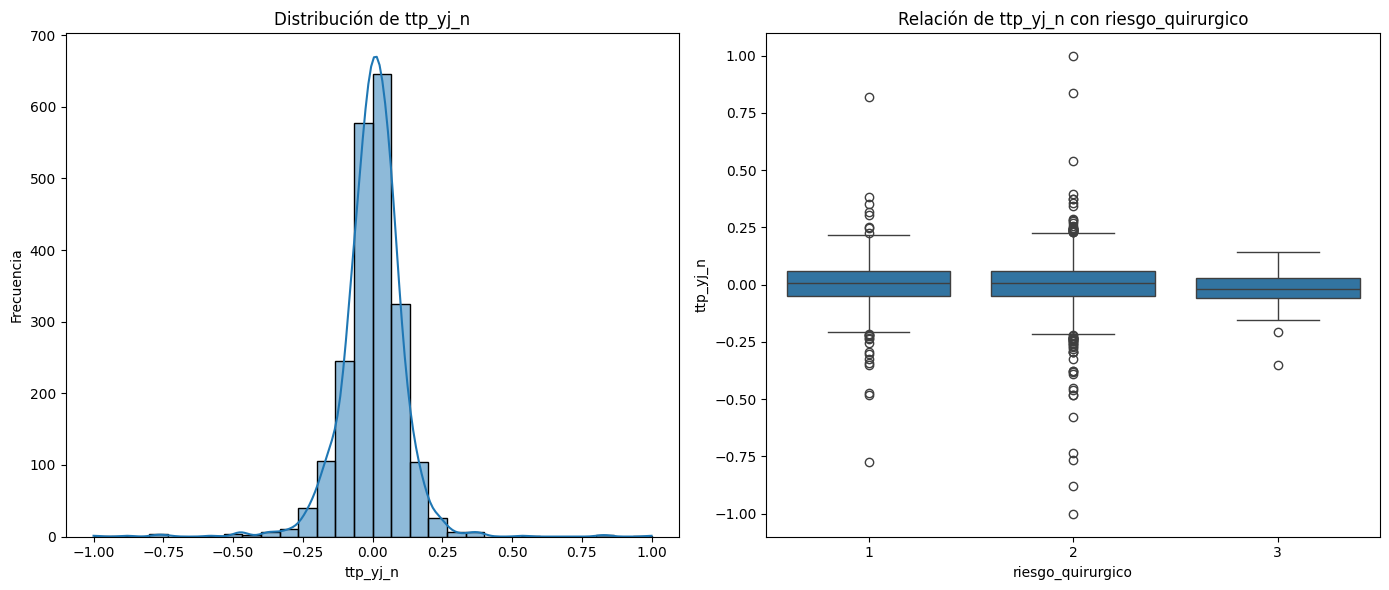

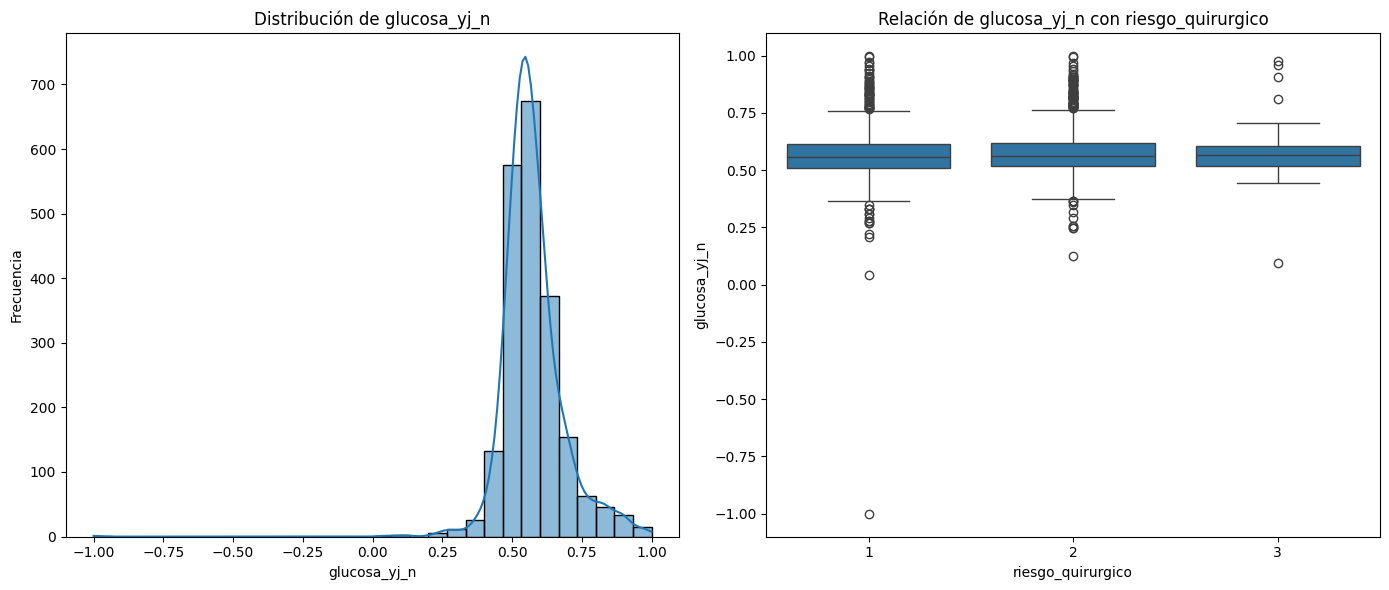

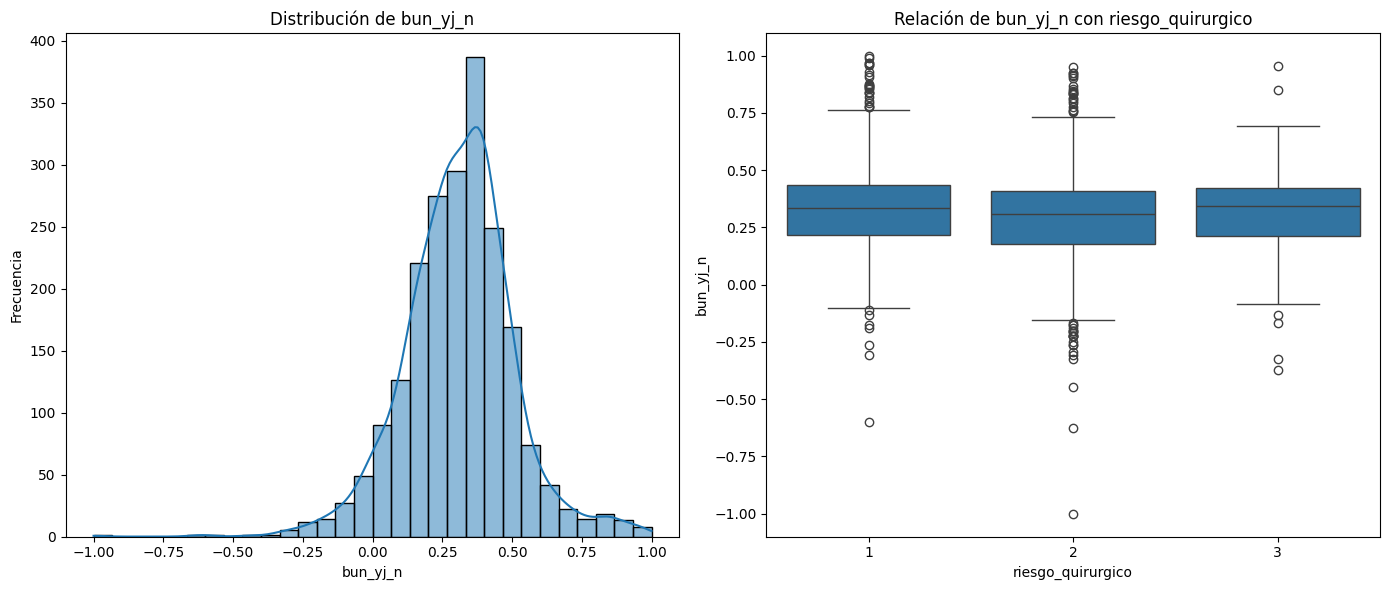

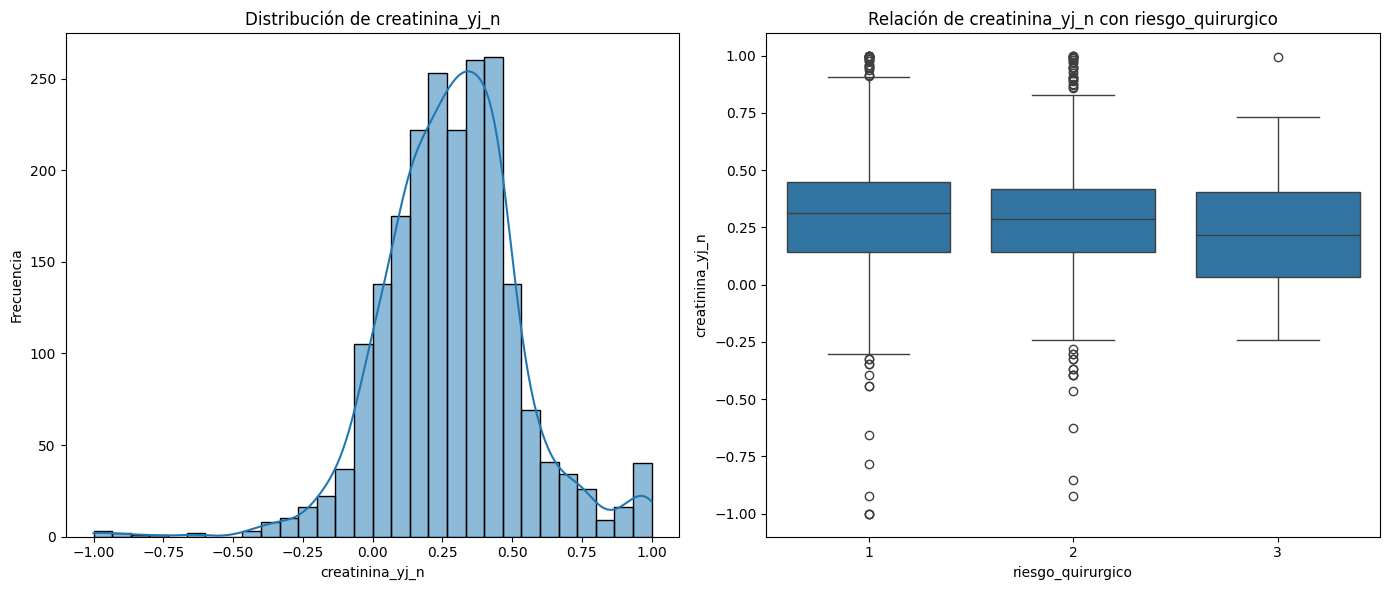

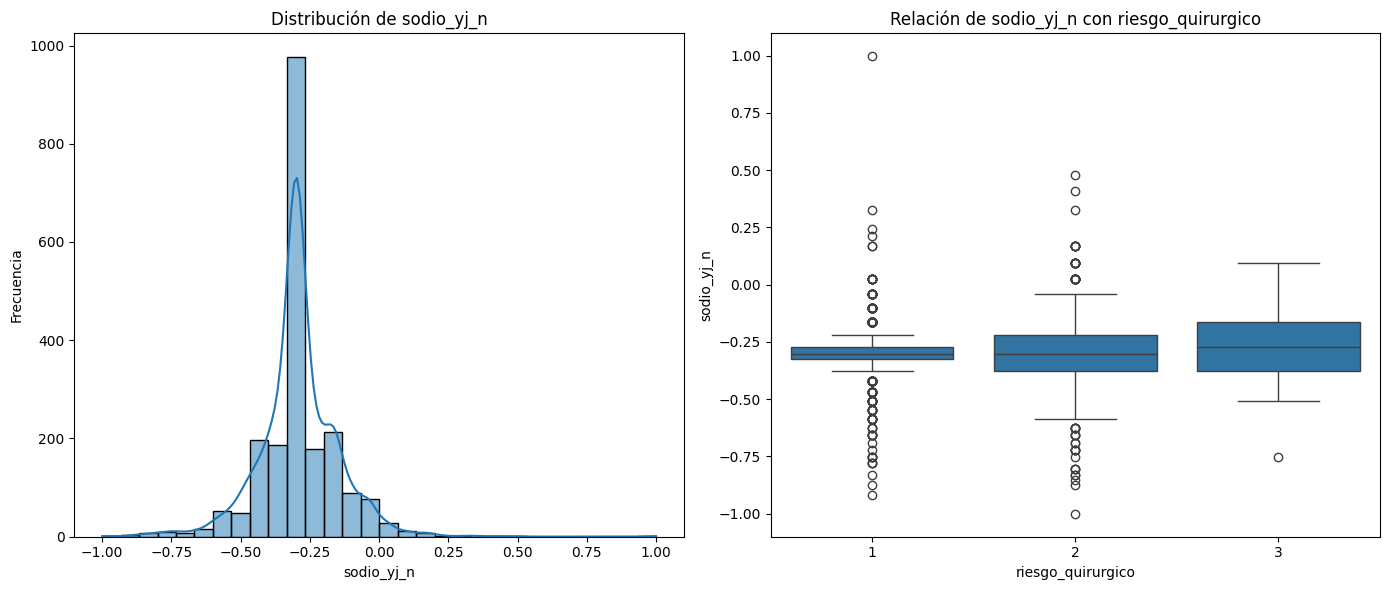

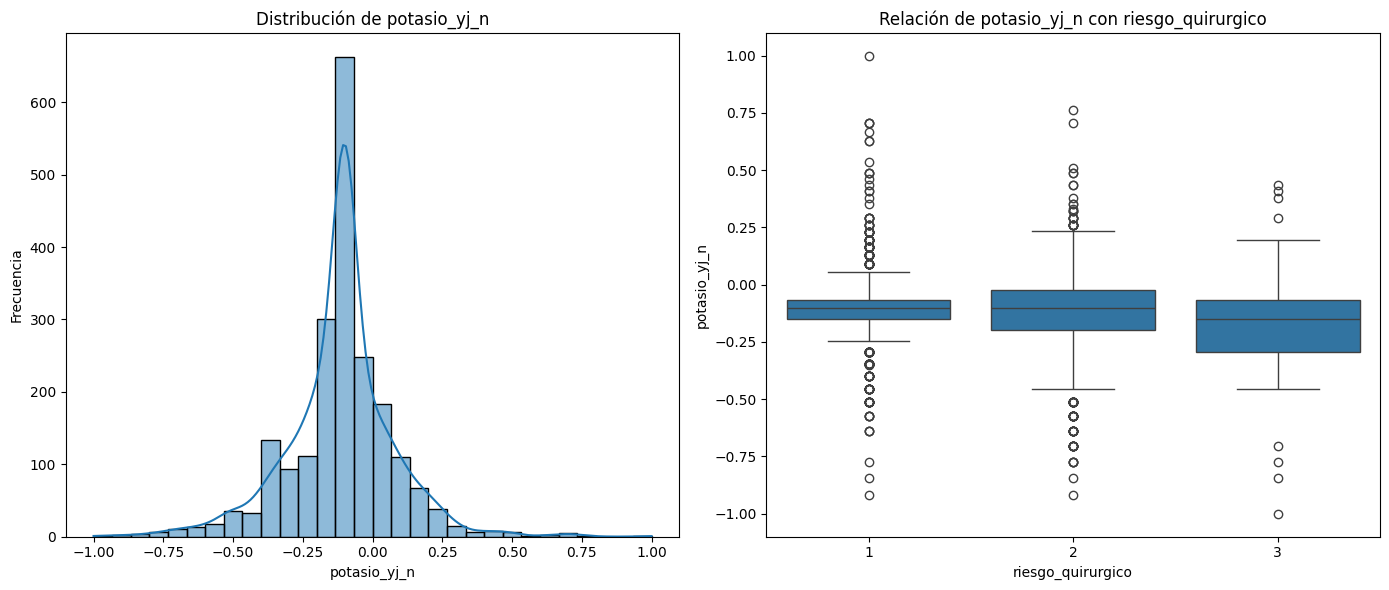

In [ ]:
# Visualización de las variables numéricas
for var in num_vars_entrada:
    plt.figure(figsize=(14, 6))

    # Histograma de la variable numérica
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], bins=30, kde=True)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

    # Boxplot para ver la relación con la variable de salida
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[var_salida[0]], y=df[var])
    plt.title(f'Relación de {var} con {var_salida[0]}')
    plt.xlabel(var_salida[0])
    plt.ylabel(var)

    plt.tight_layout()
    plt.show()

Visualización de las Variables Numéricas:

  * Histograma: para ver la distribución de las variables numéricas.
    
  * Boxplot: para visualizar cómo varían las variables numéricas con respecto a la variable de salida var_salida. Esto es útil para identificar diferencias en la distribución de las variables según el valor de la variable de salida.

Distribución de las variables numéricas: El histograma permite ver la forma de los datos (sesgada, simétrica, etc.), mientras que el boxplot revela posibles valores atípicos y la mediana de las distribuciones por categorías de la variable de salida.

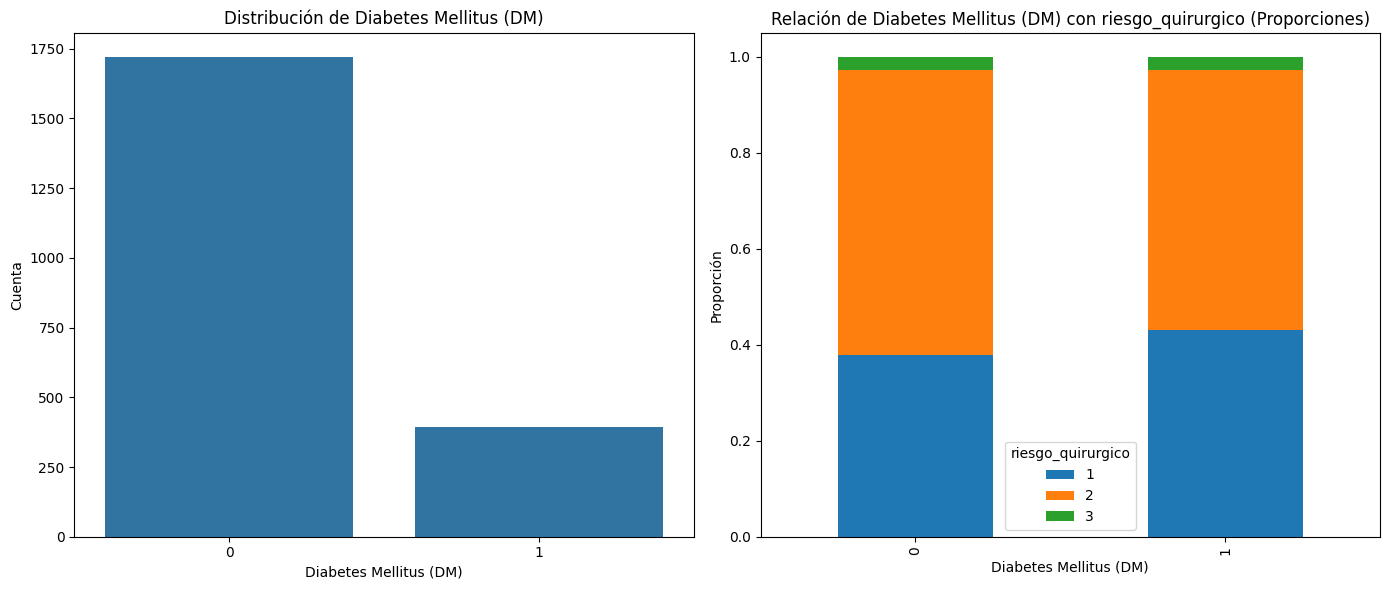

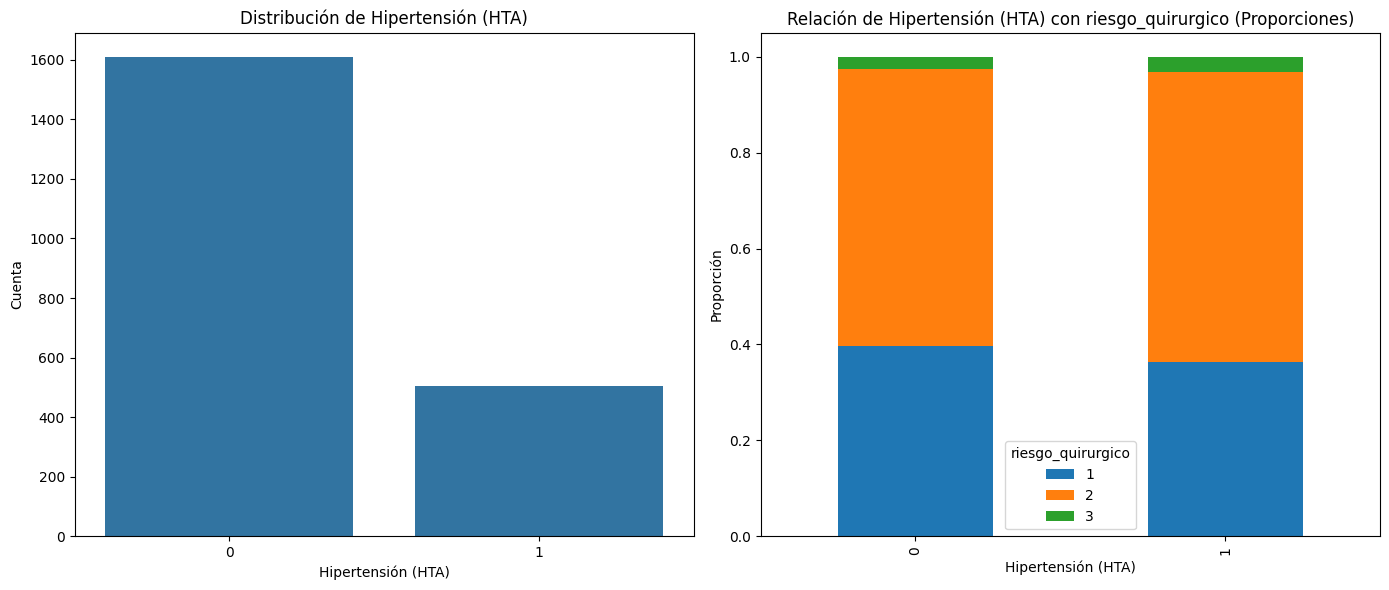

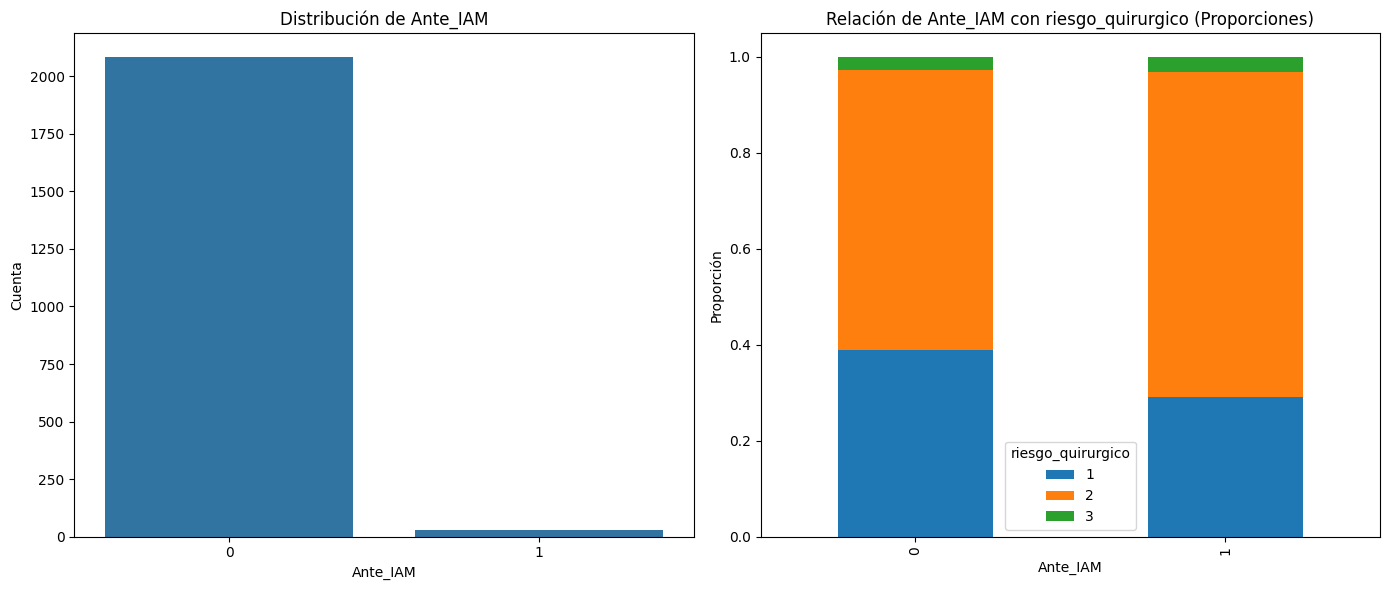

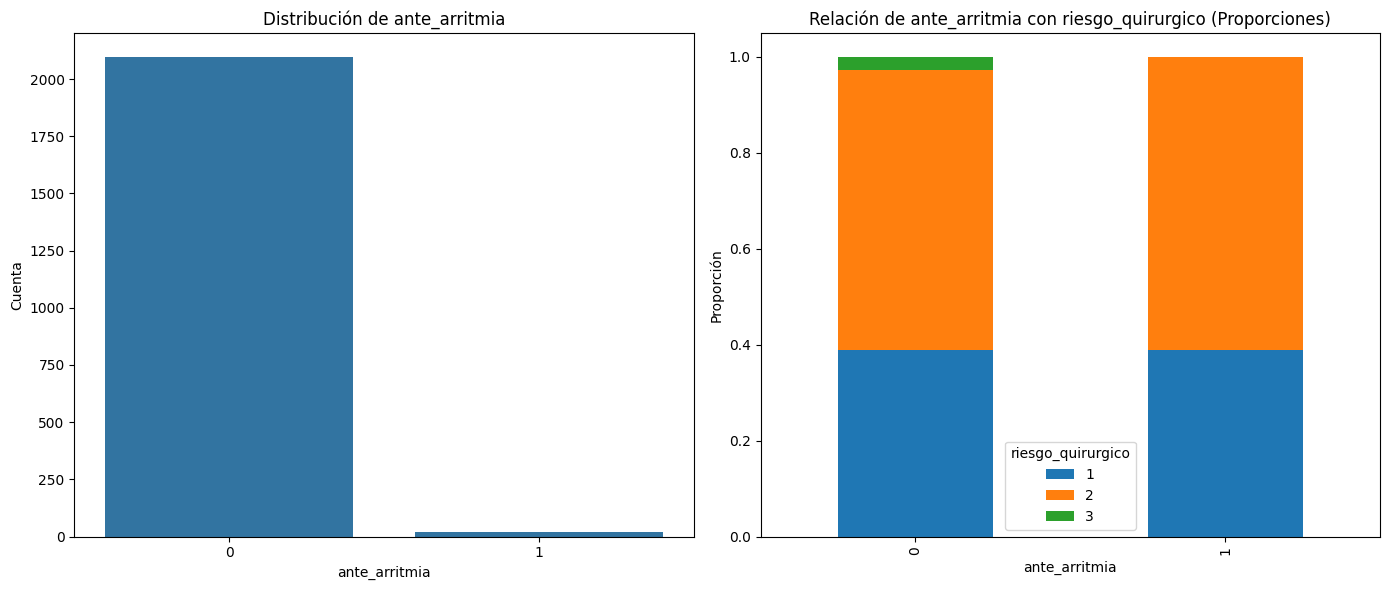

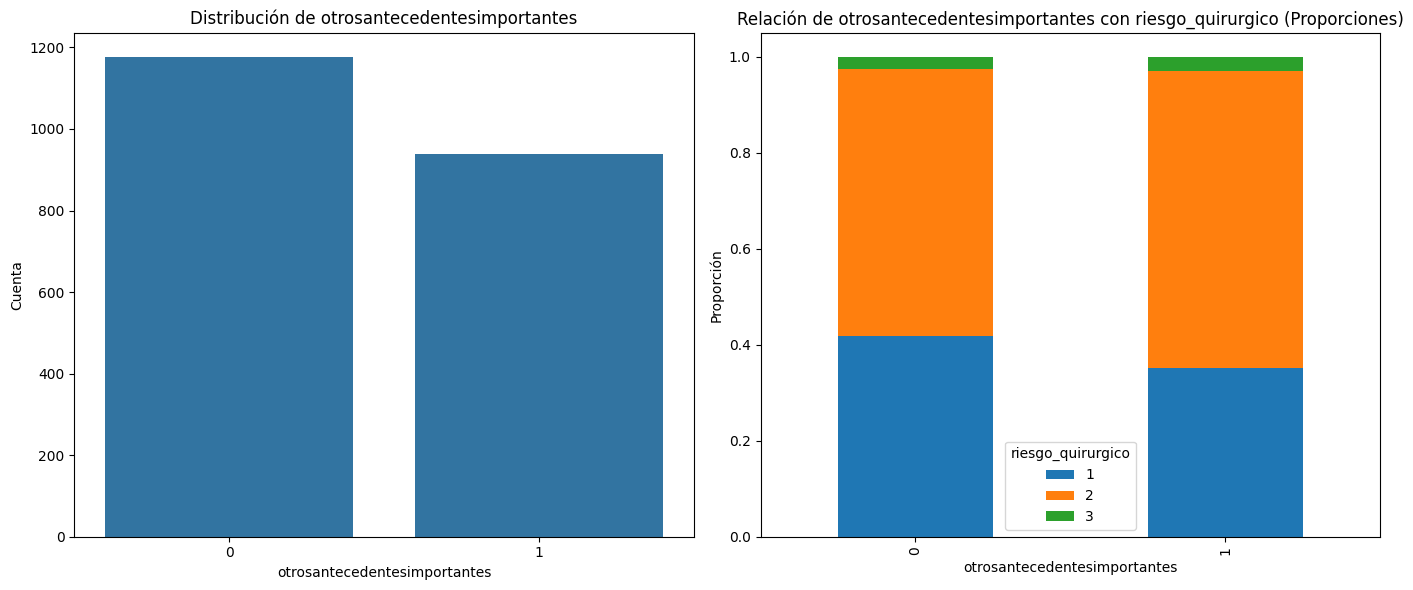

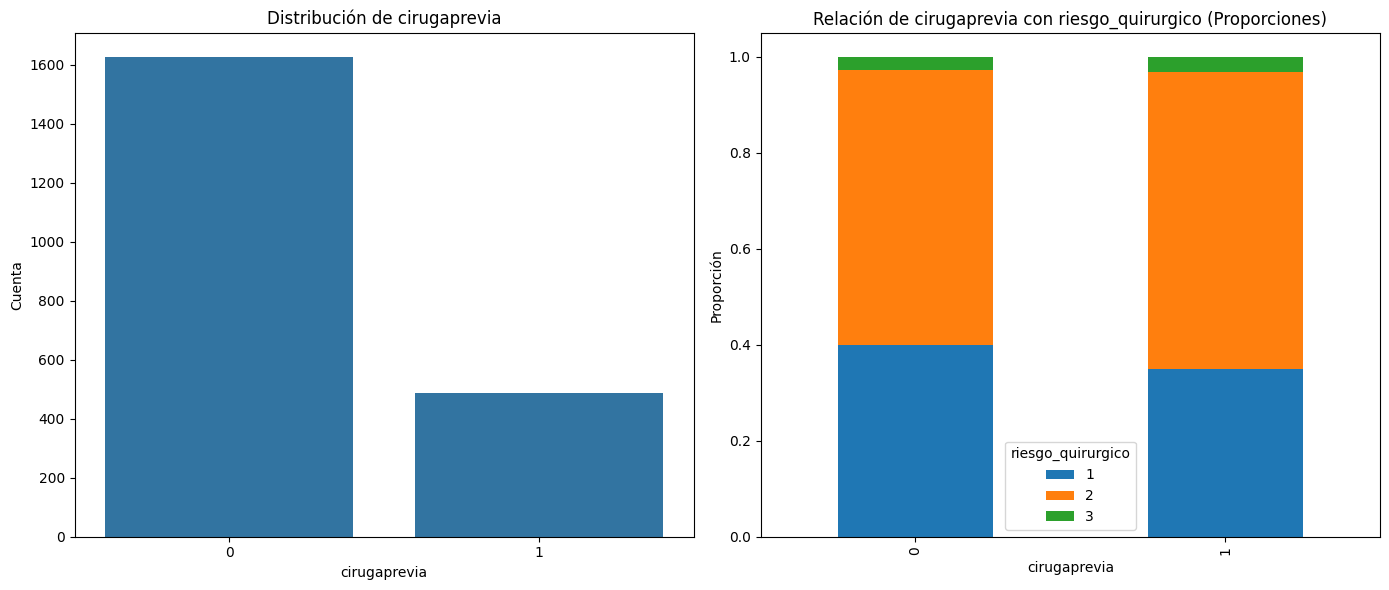

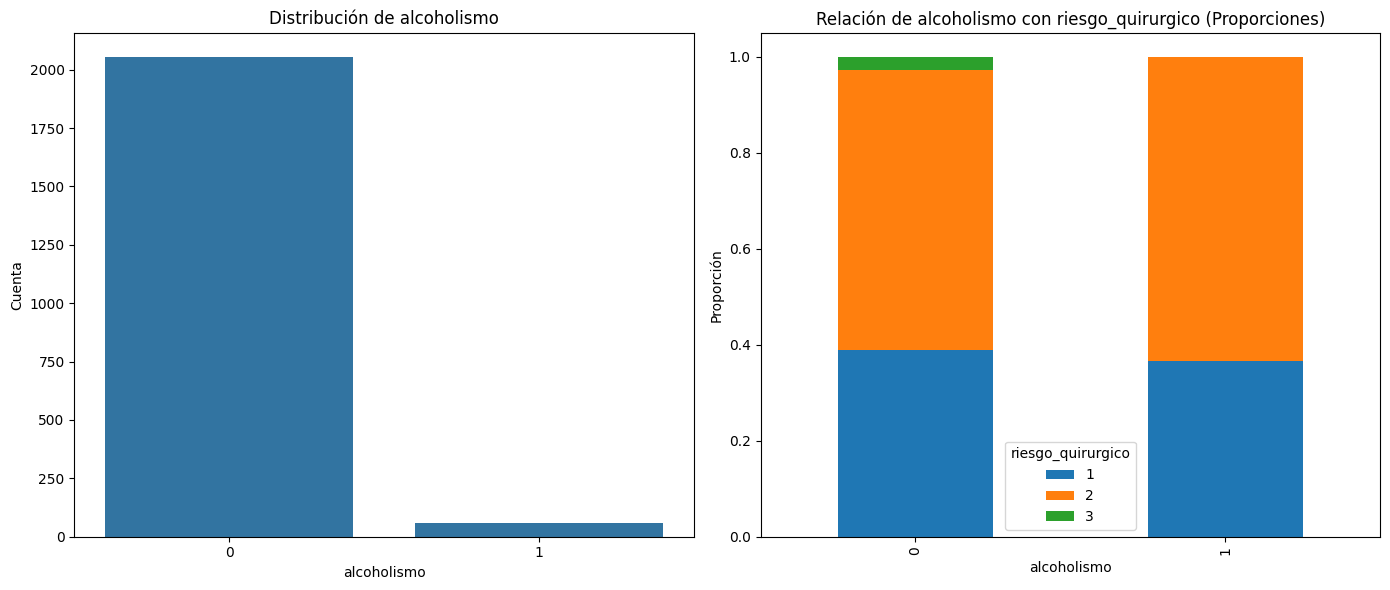

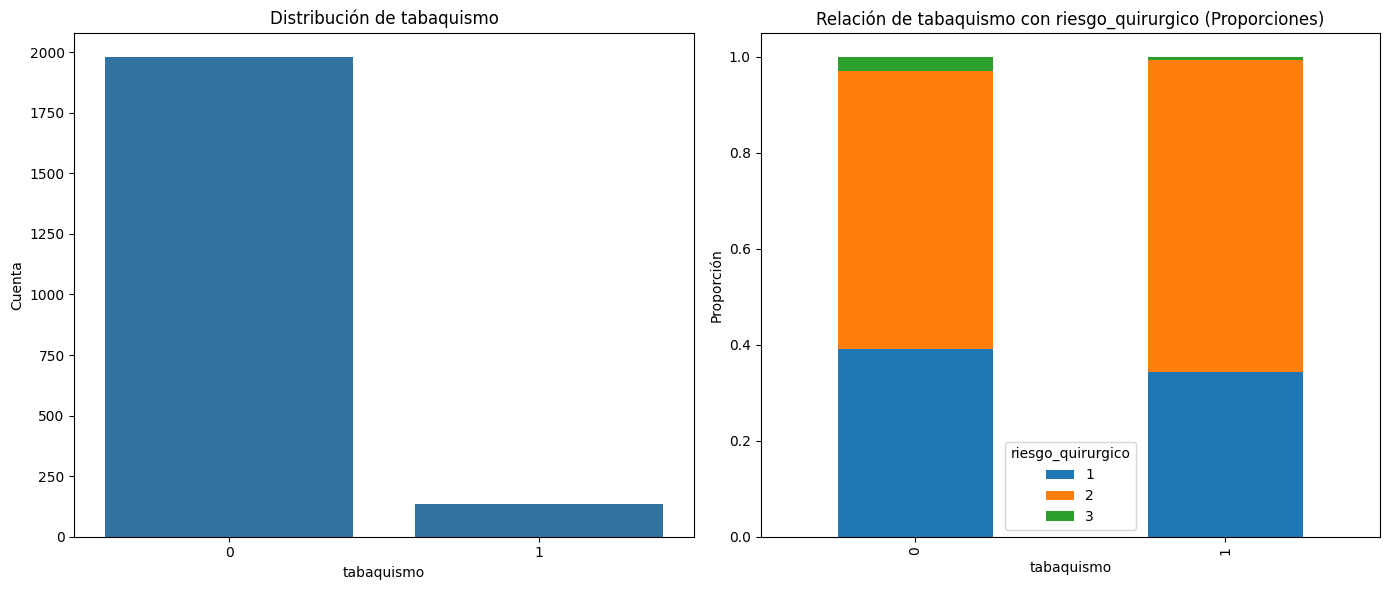

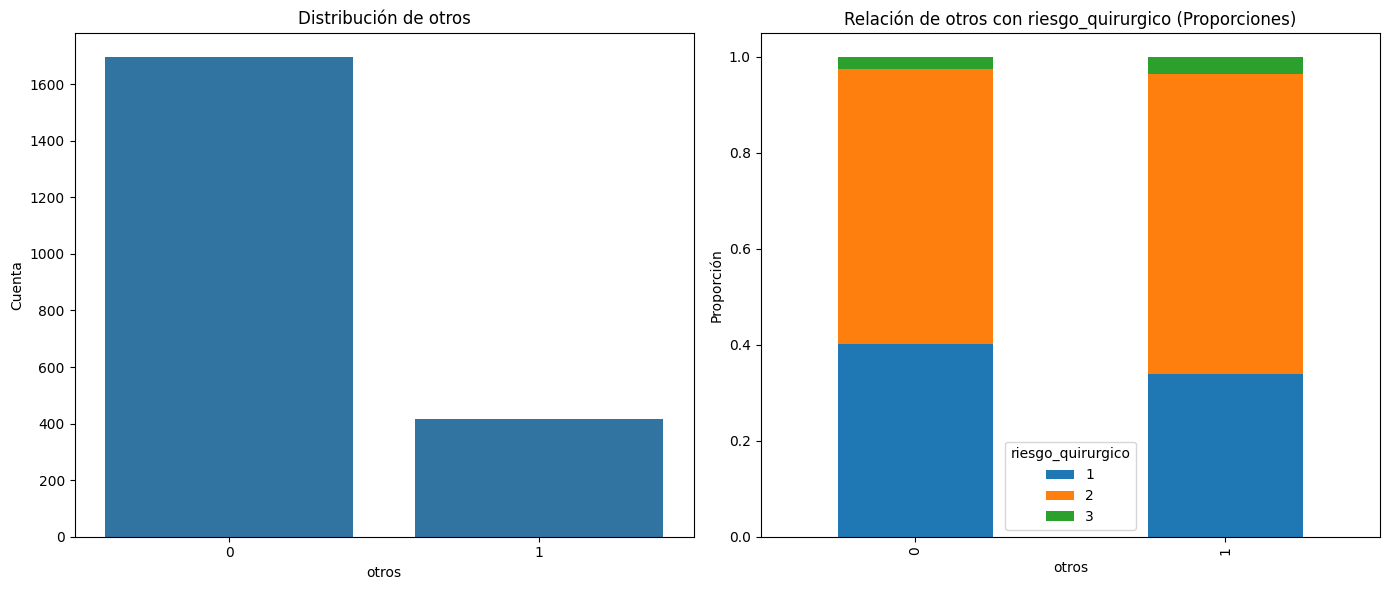

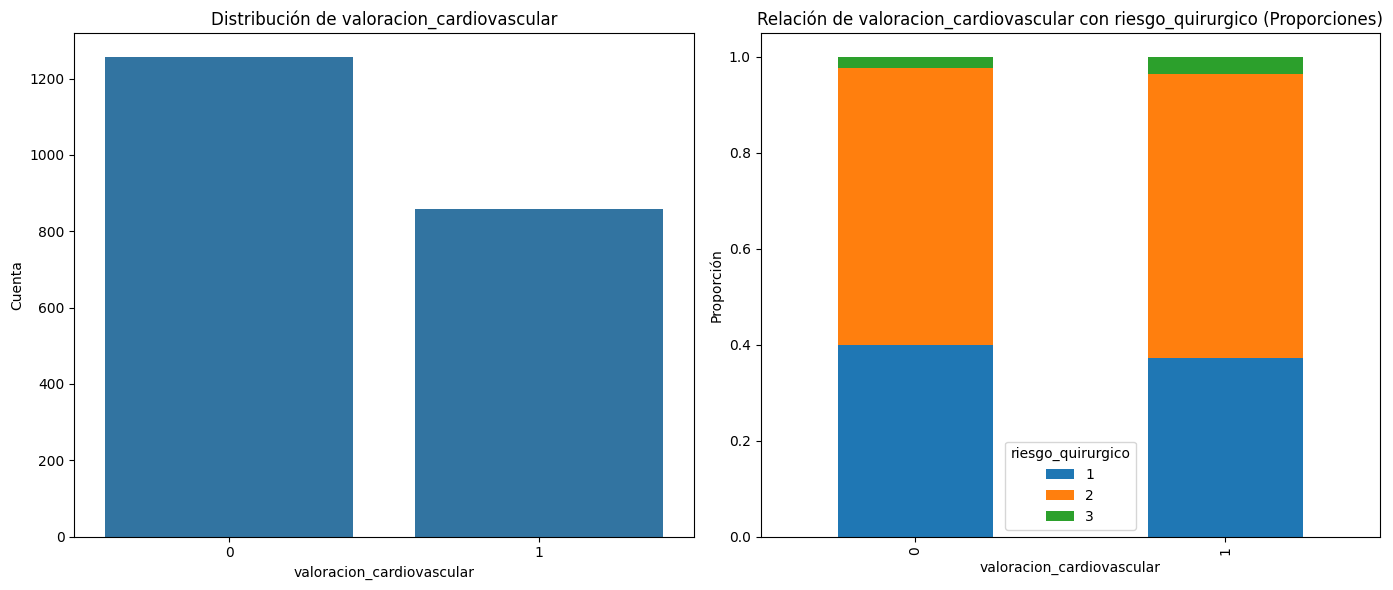

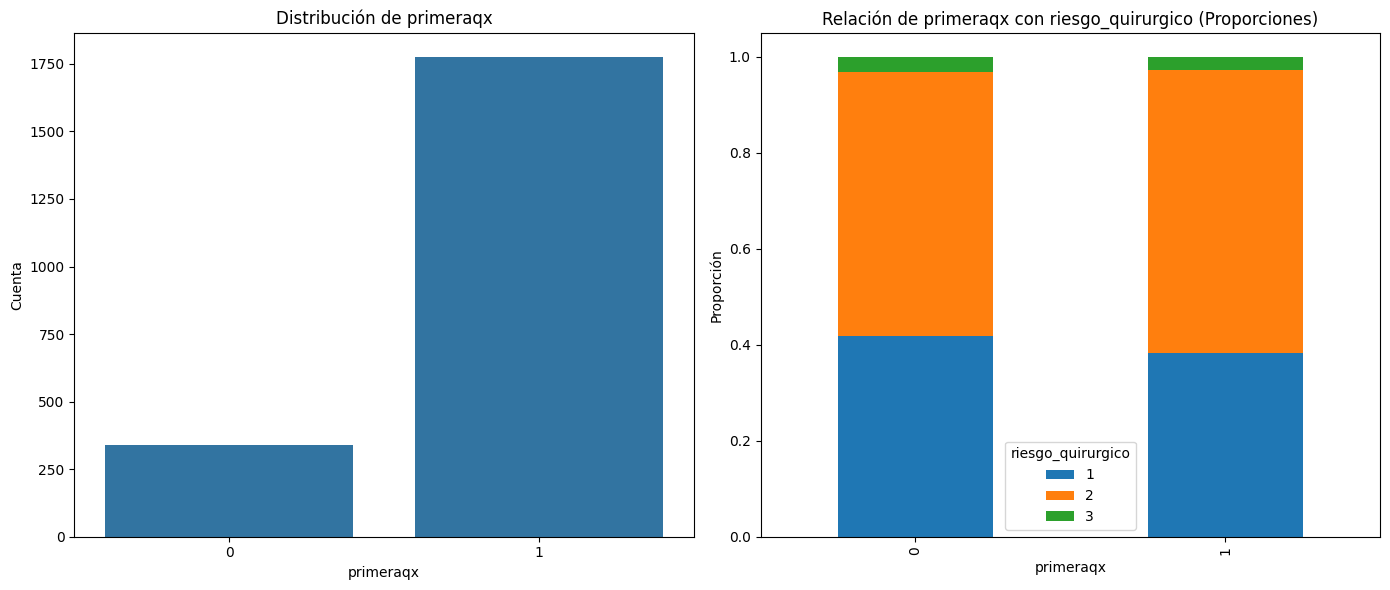

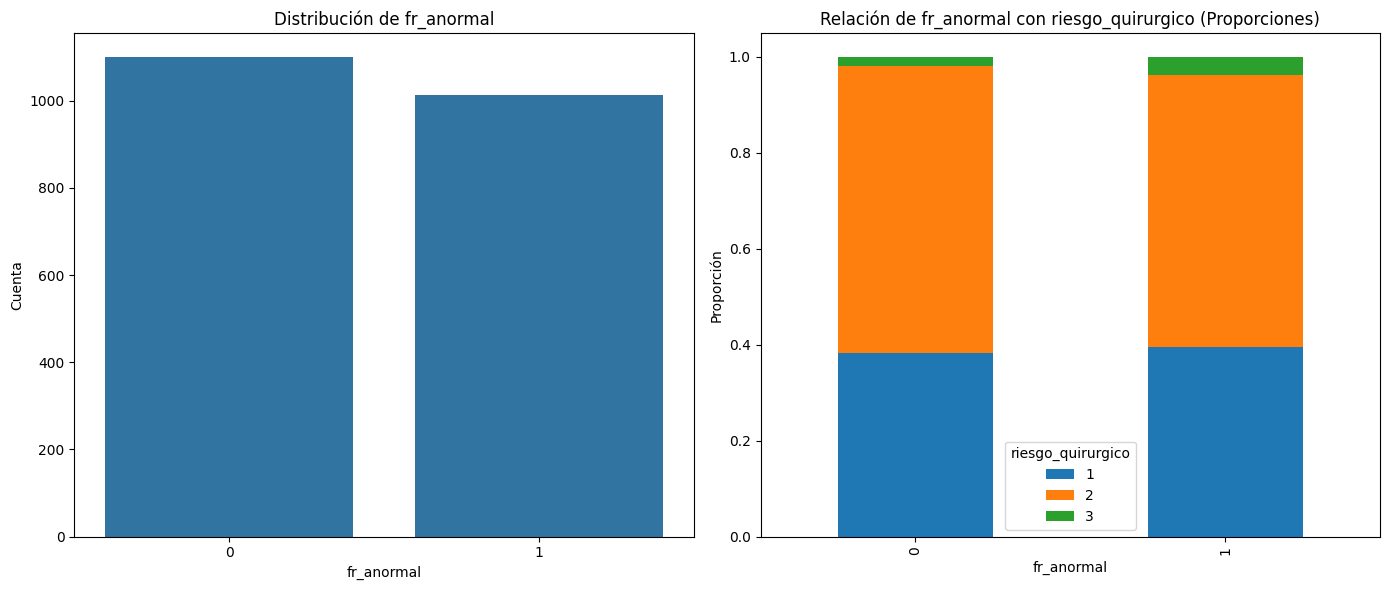

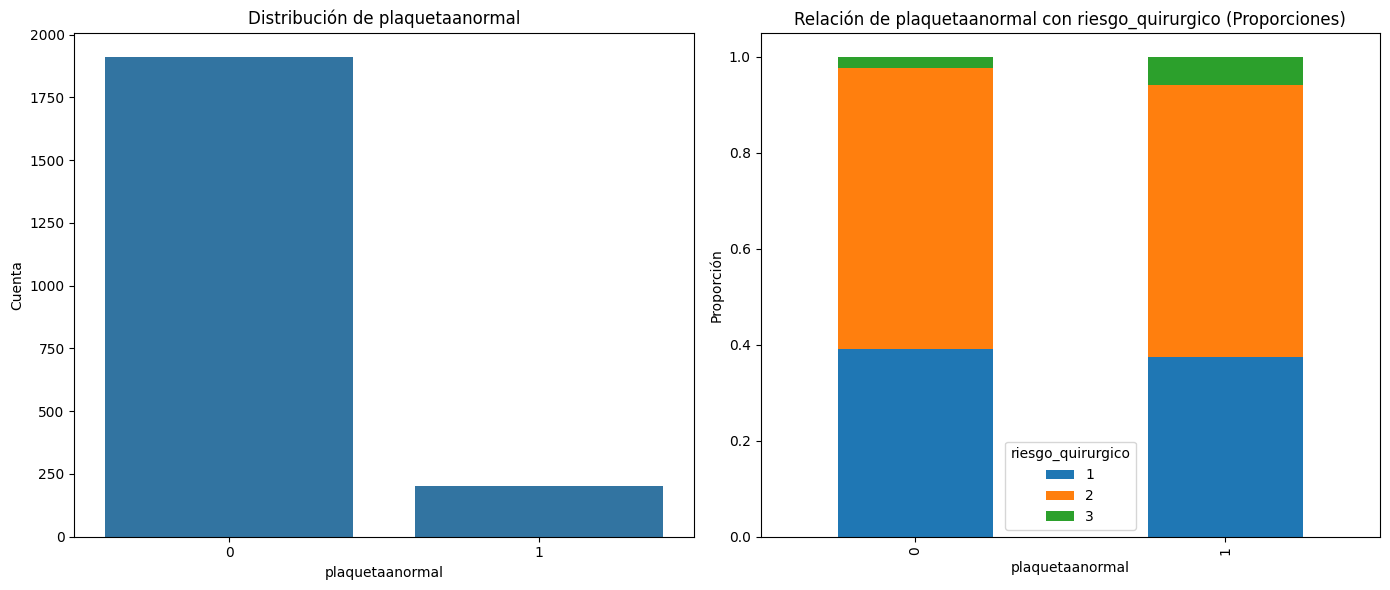

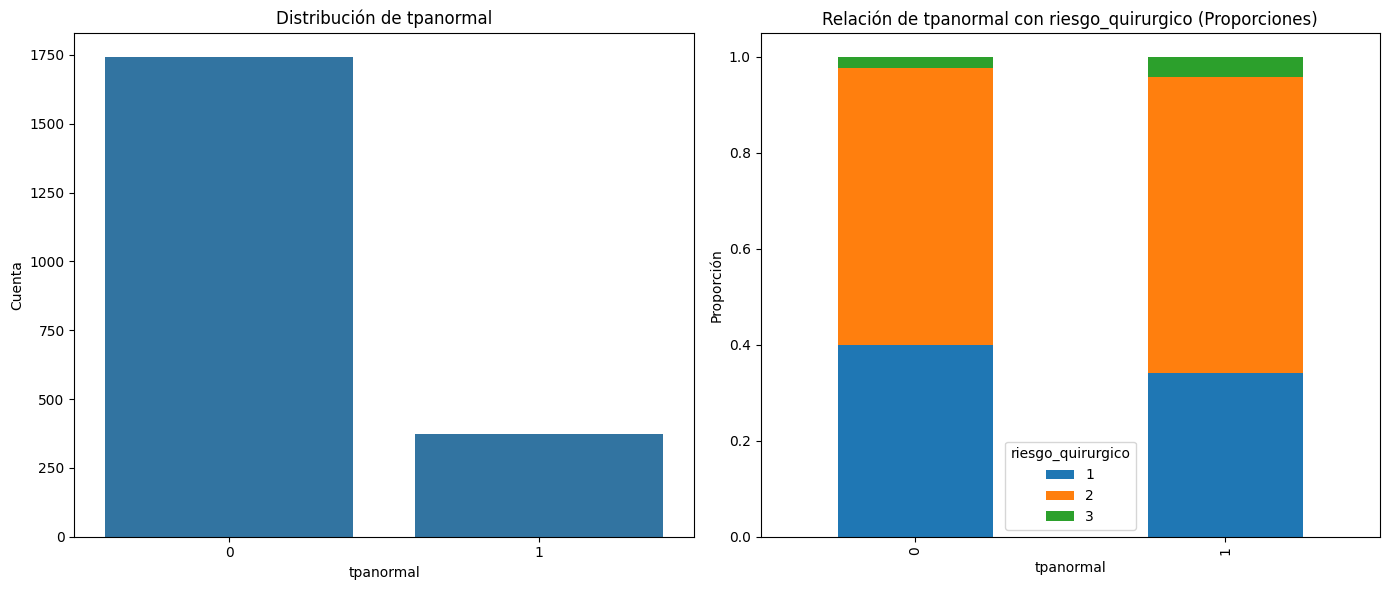

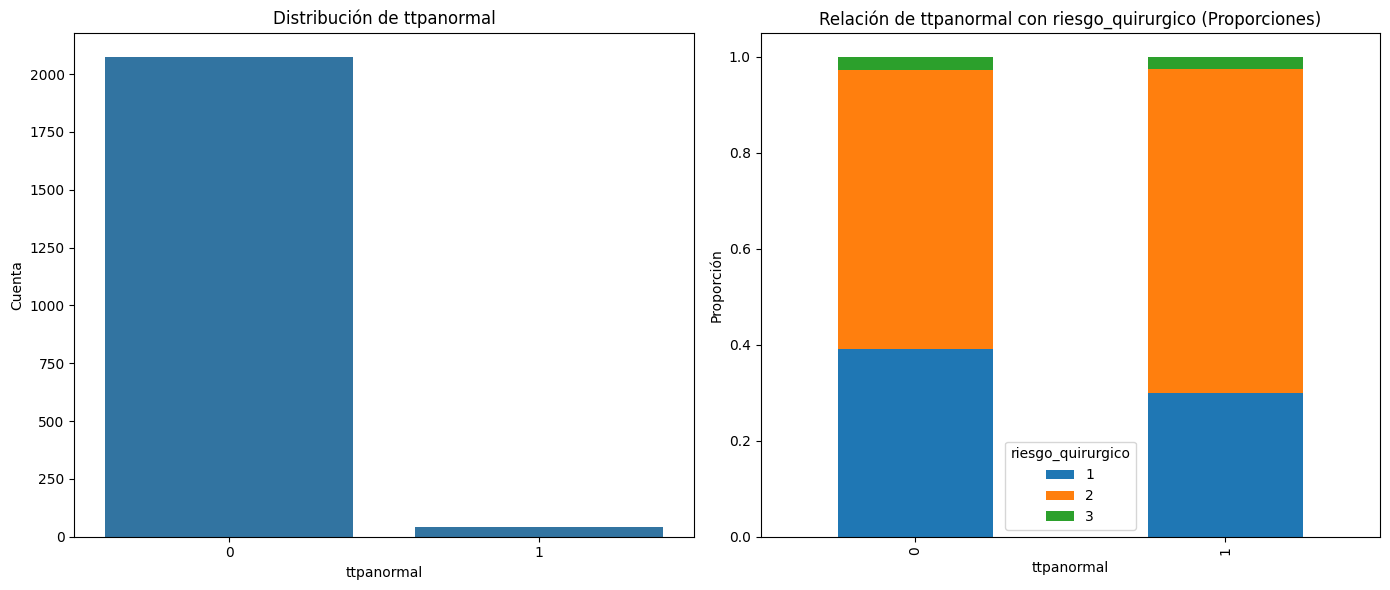

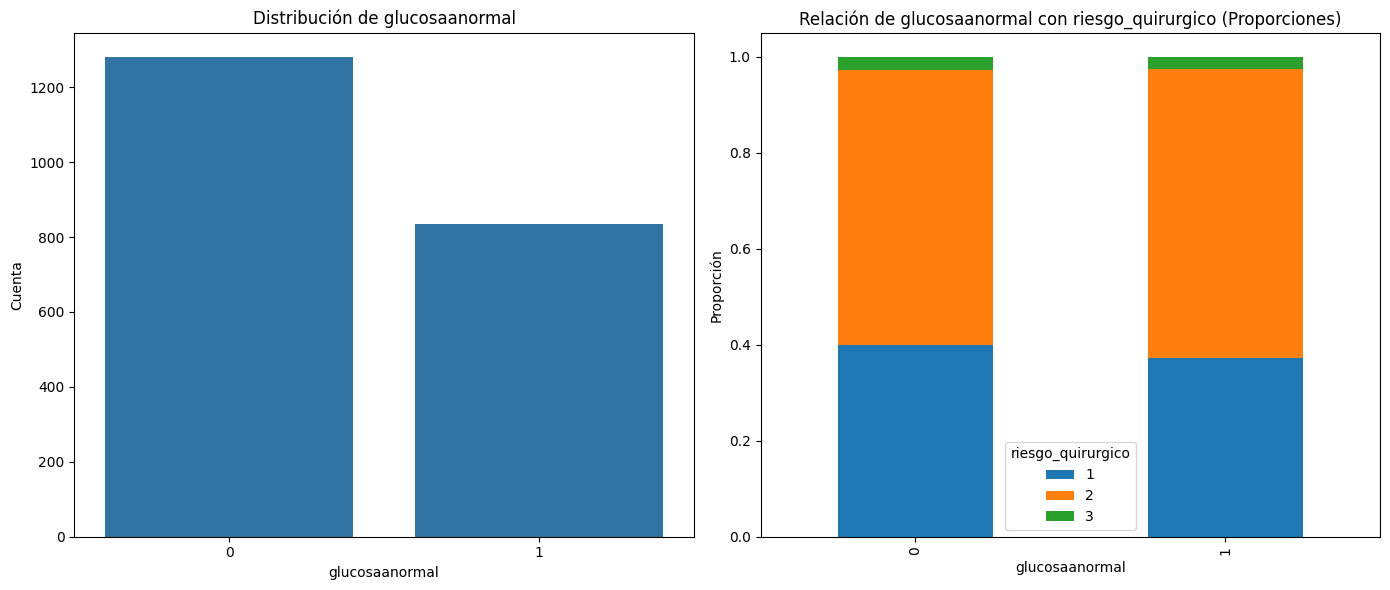

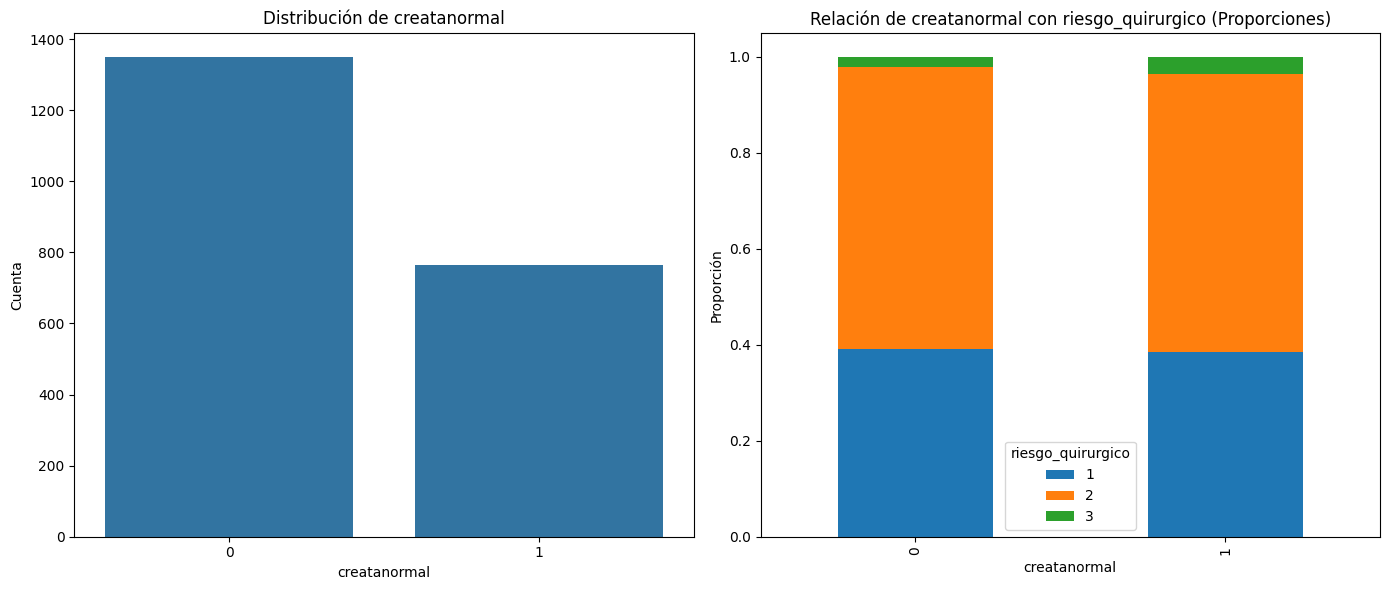

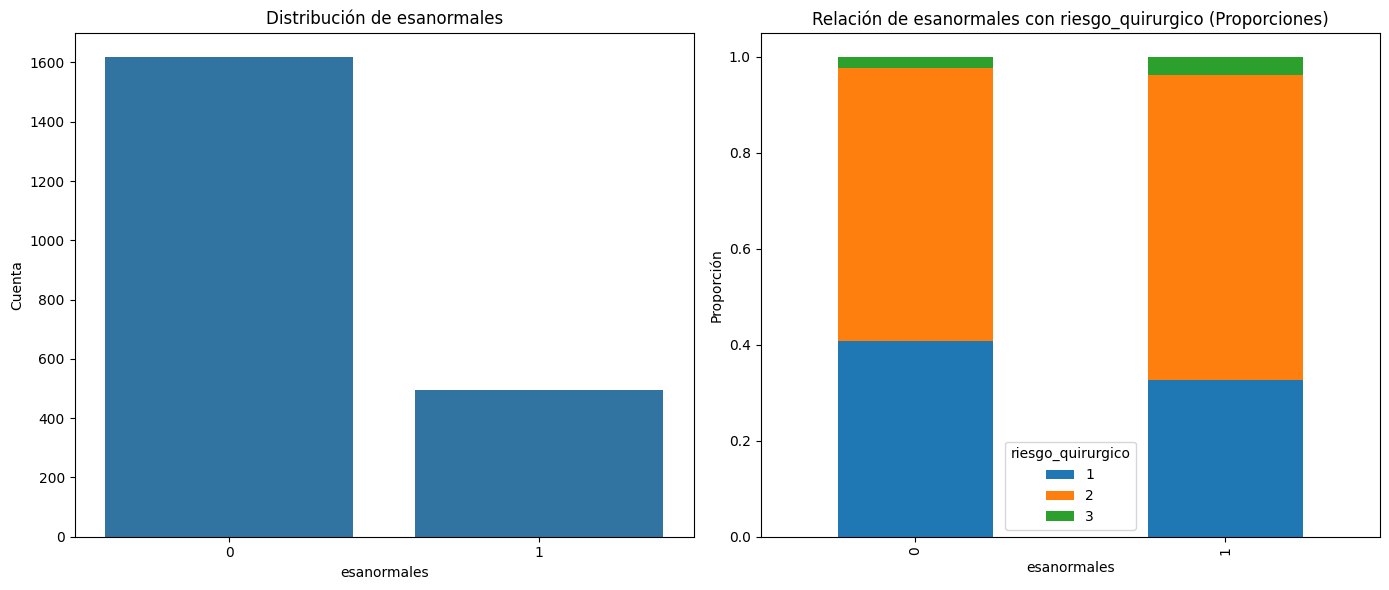

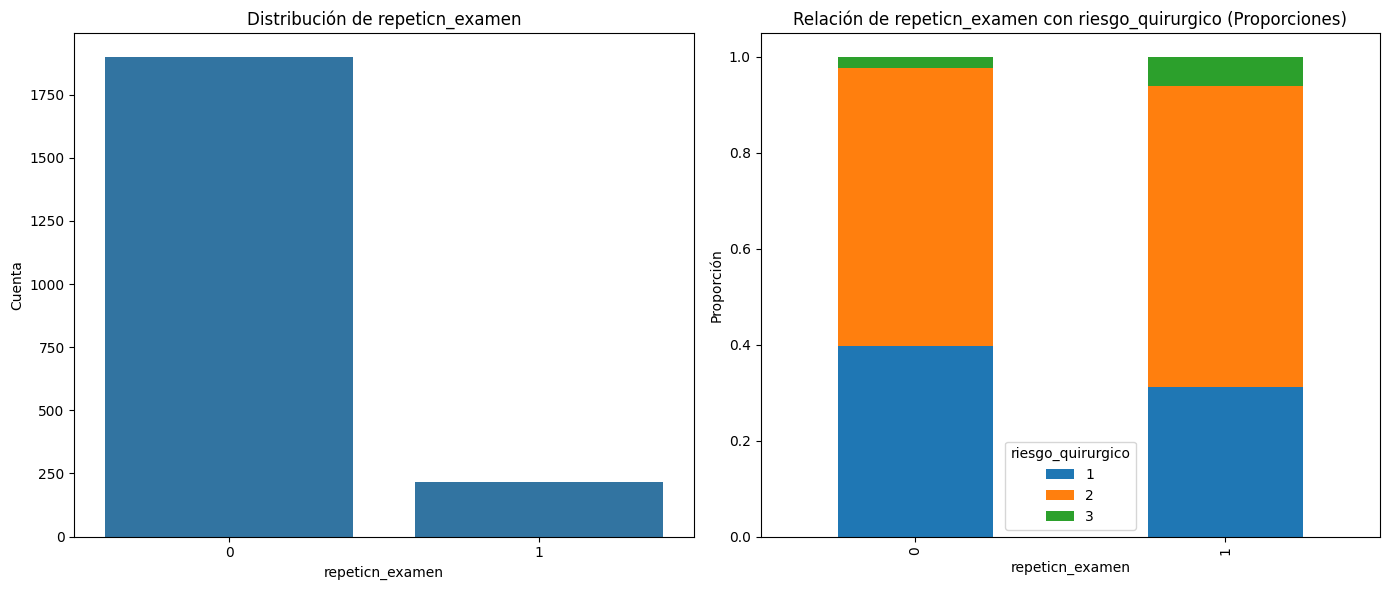

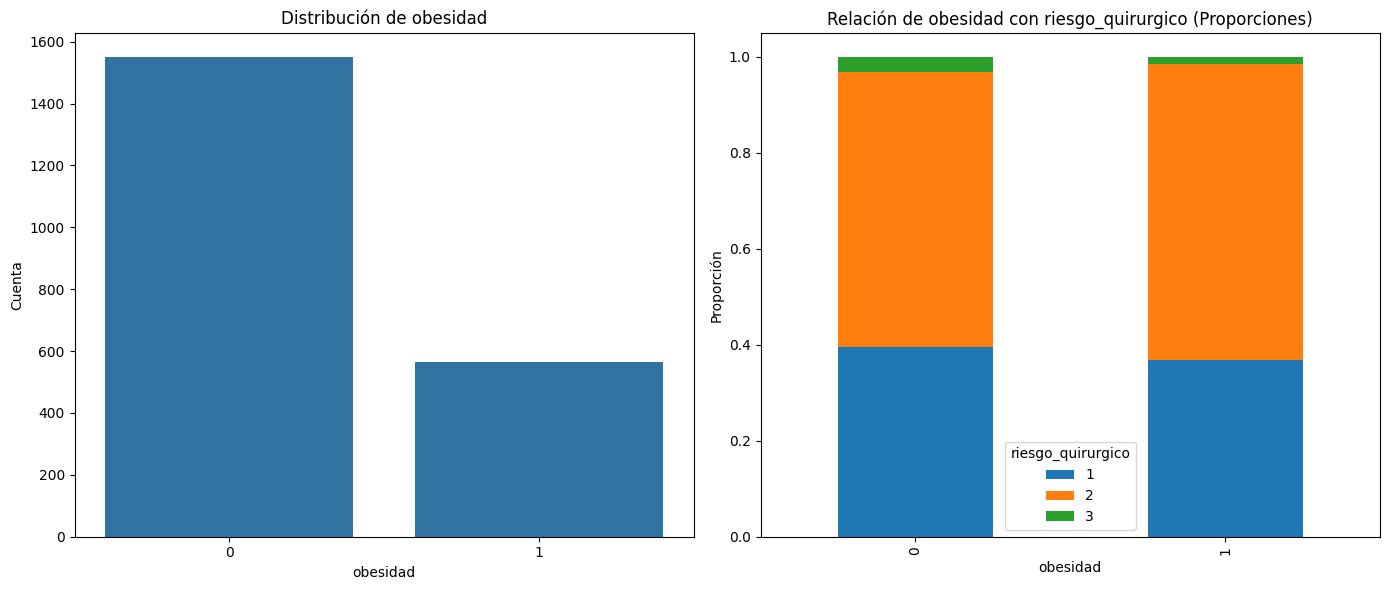

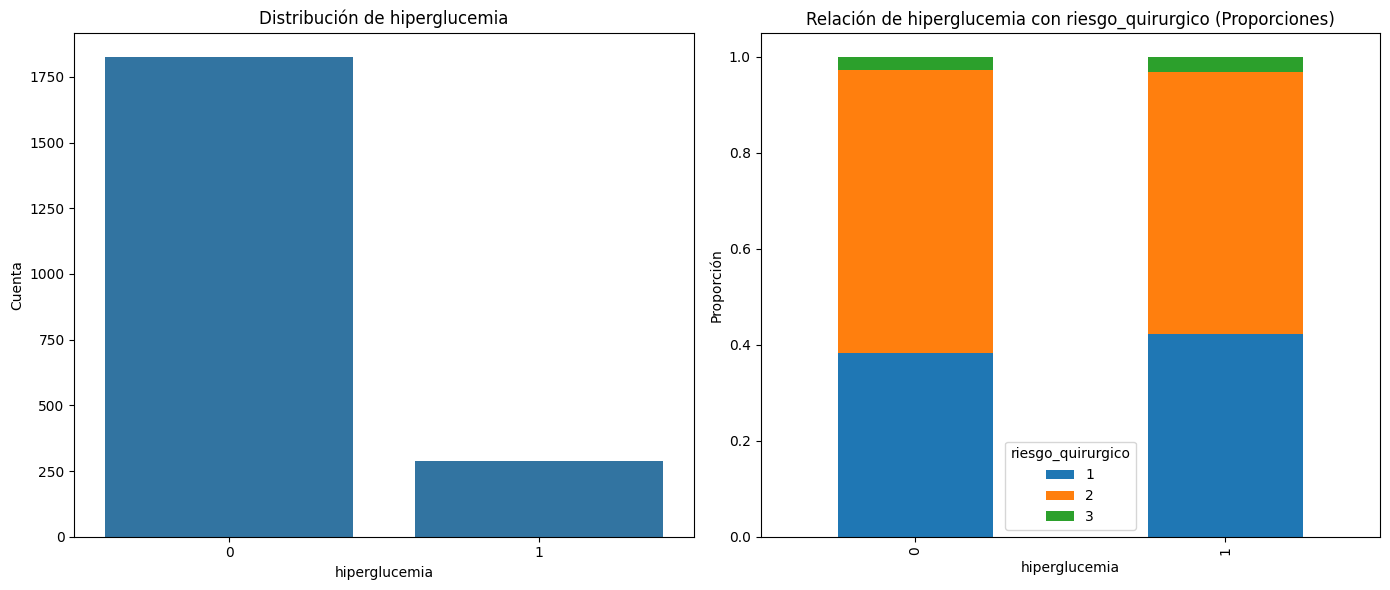

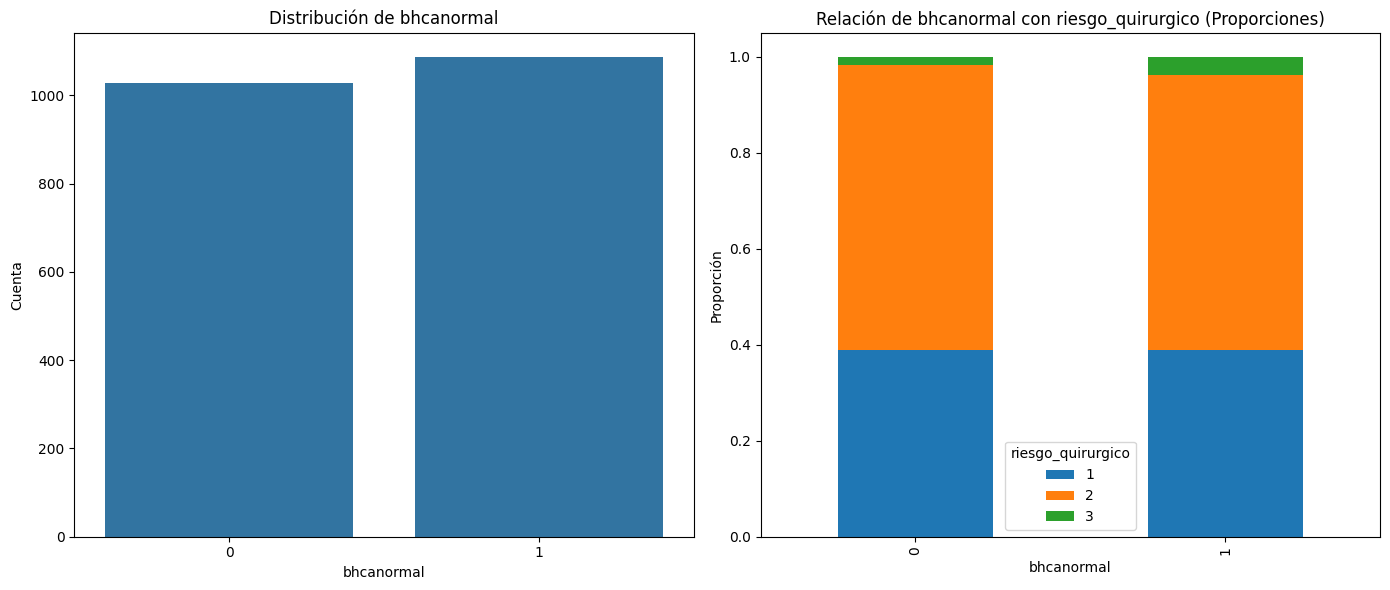

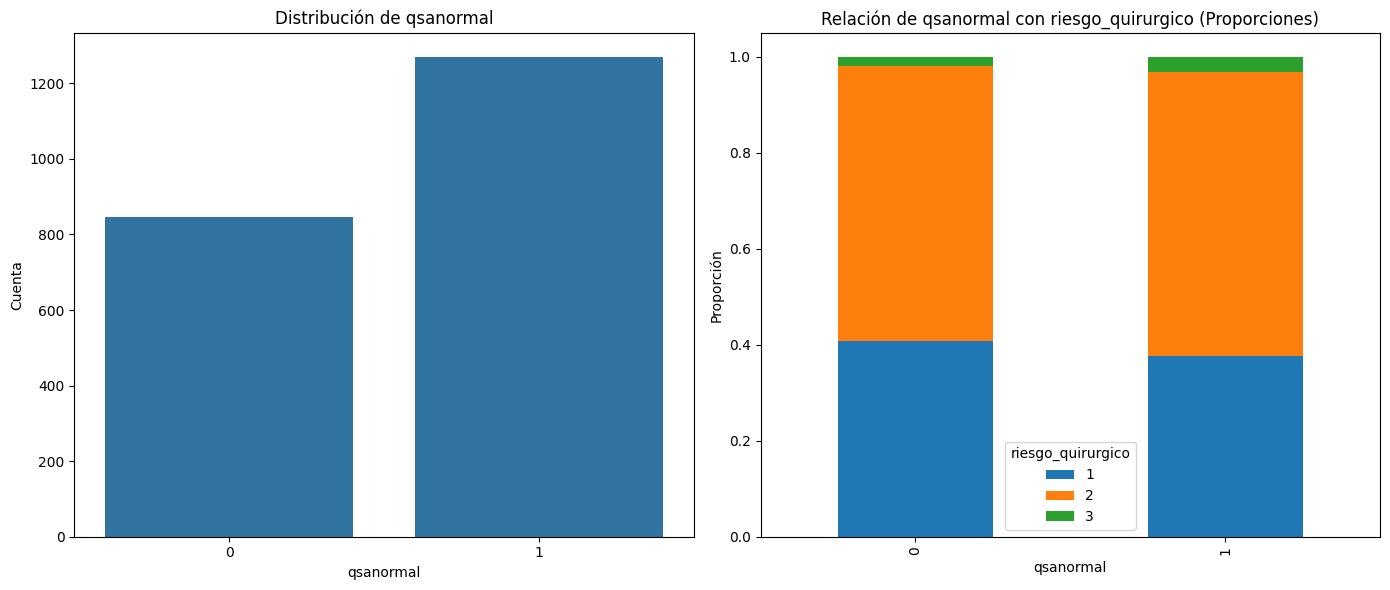

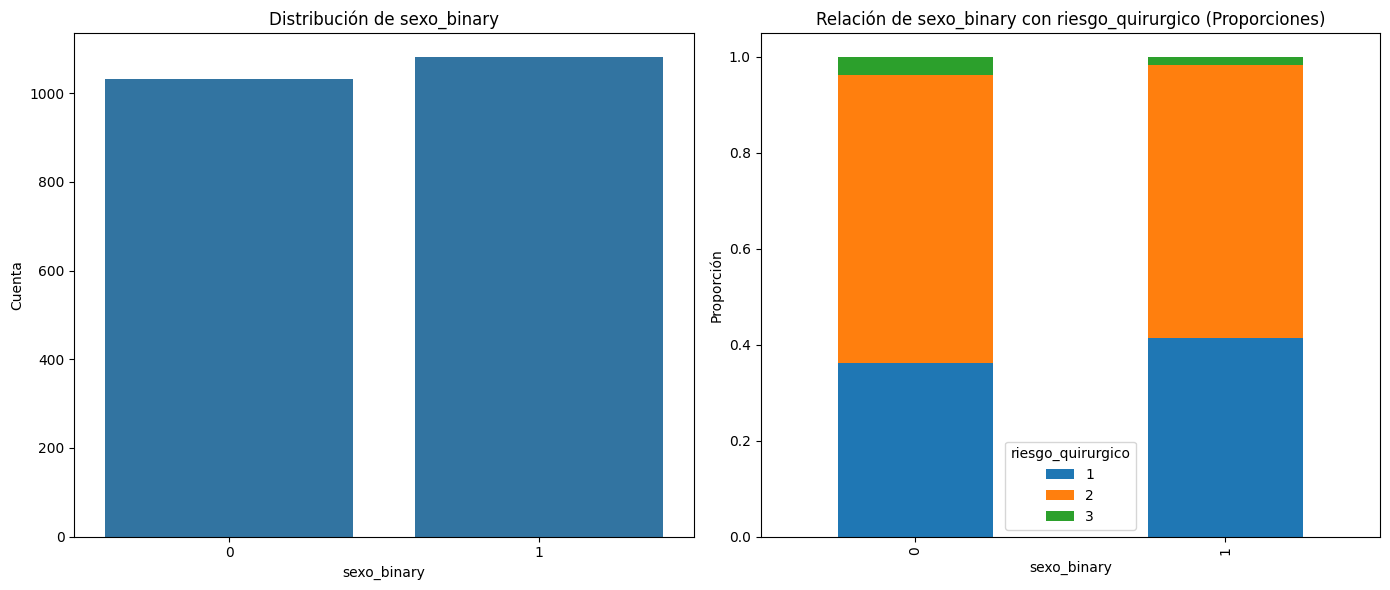

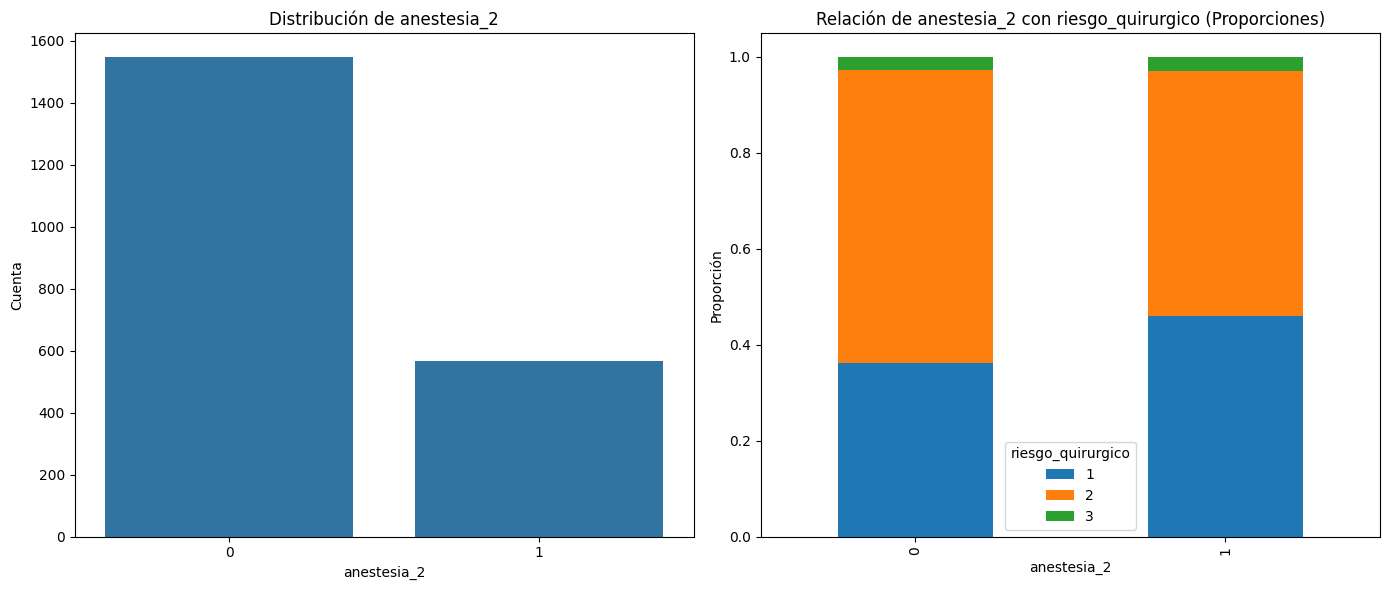

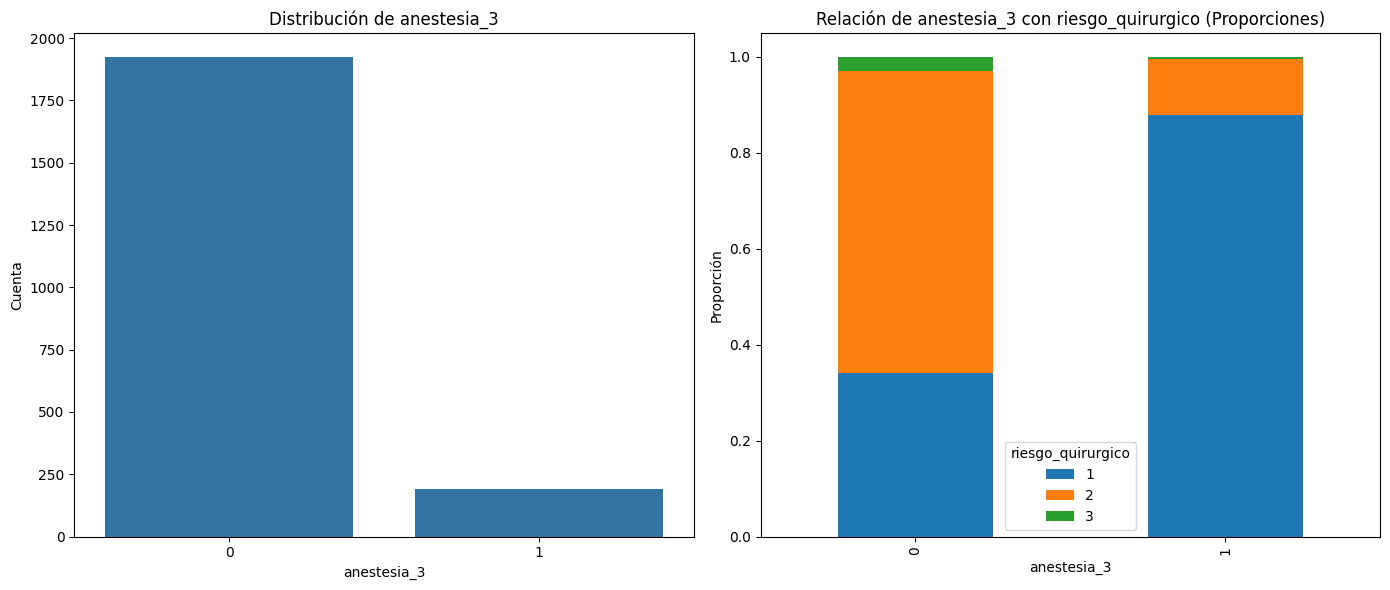

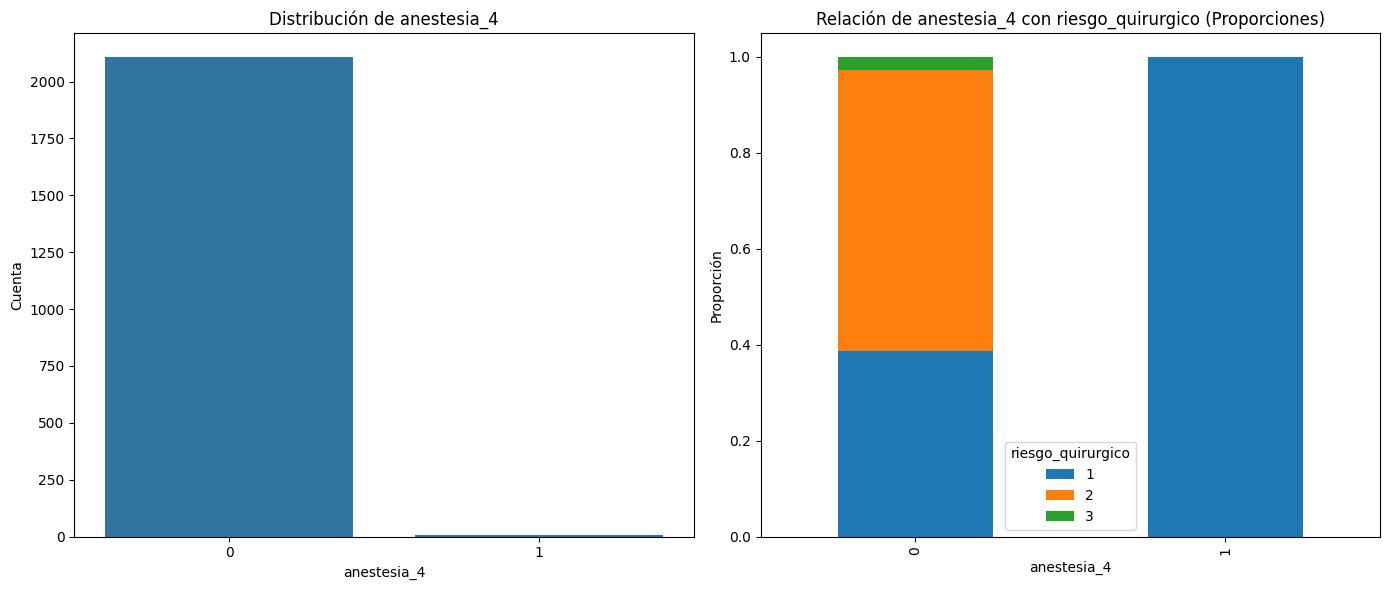

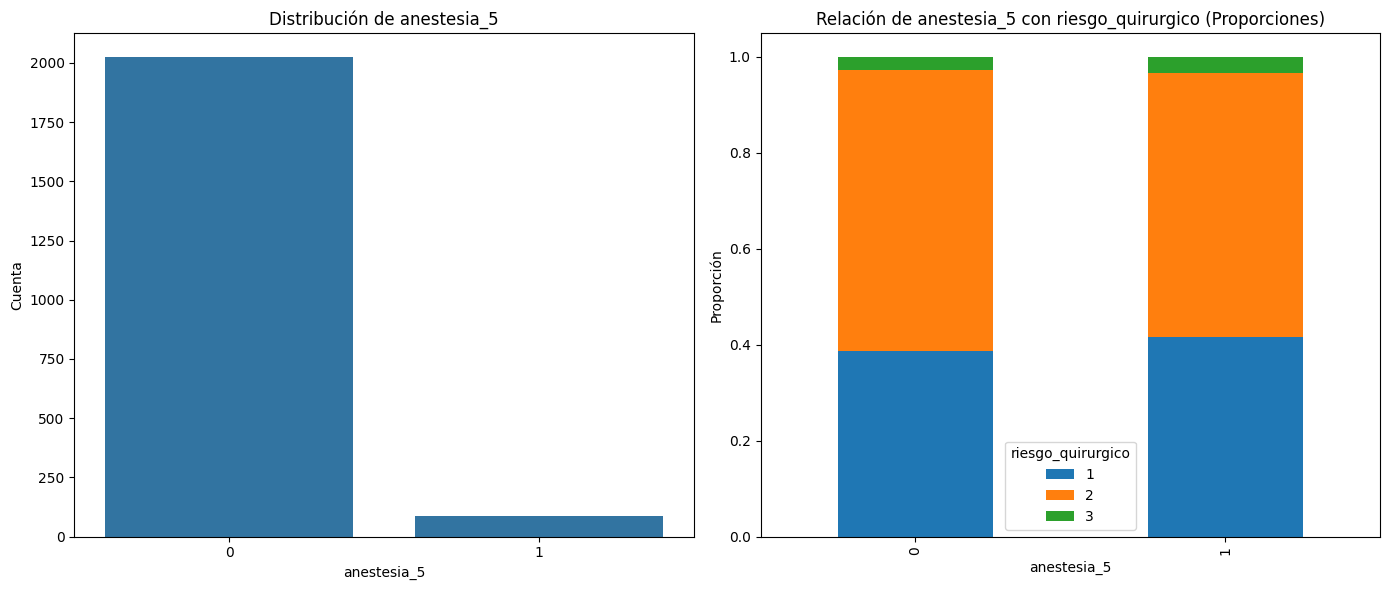

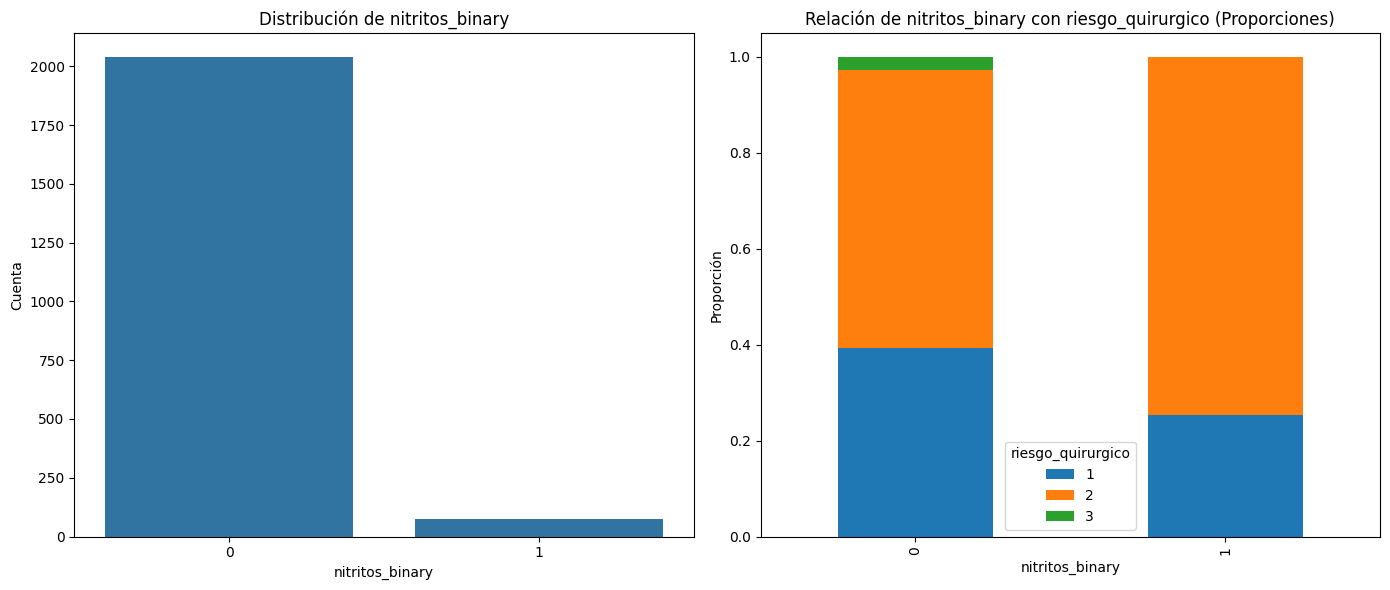

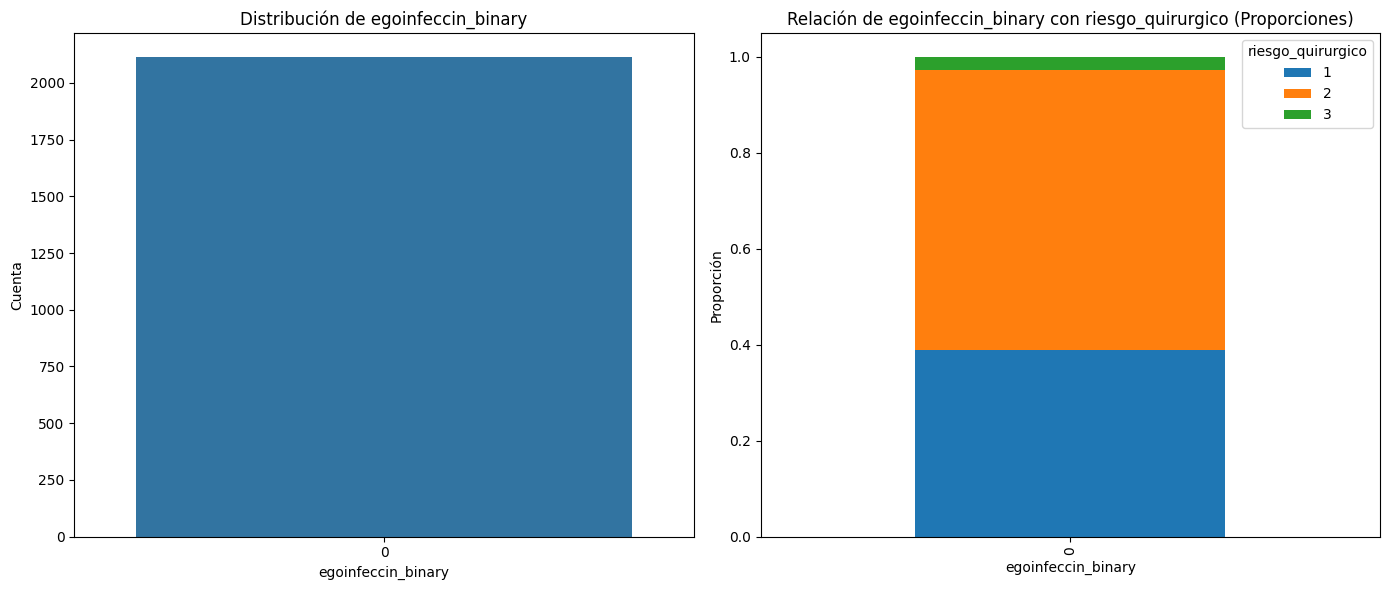

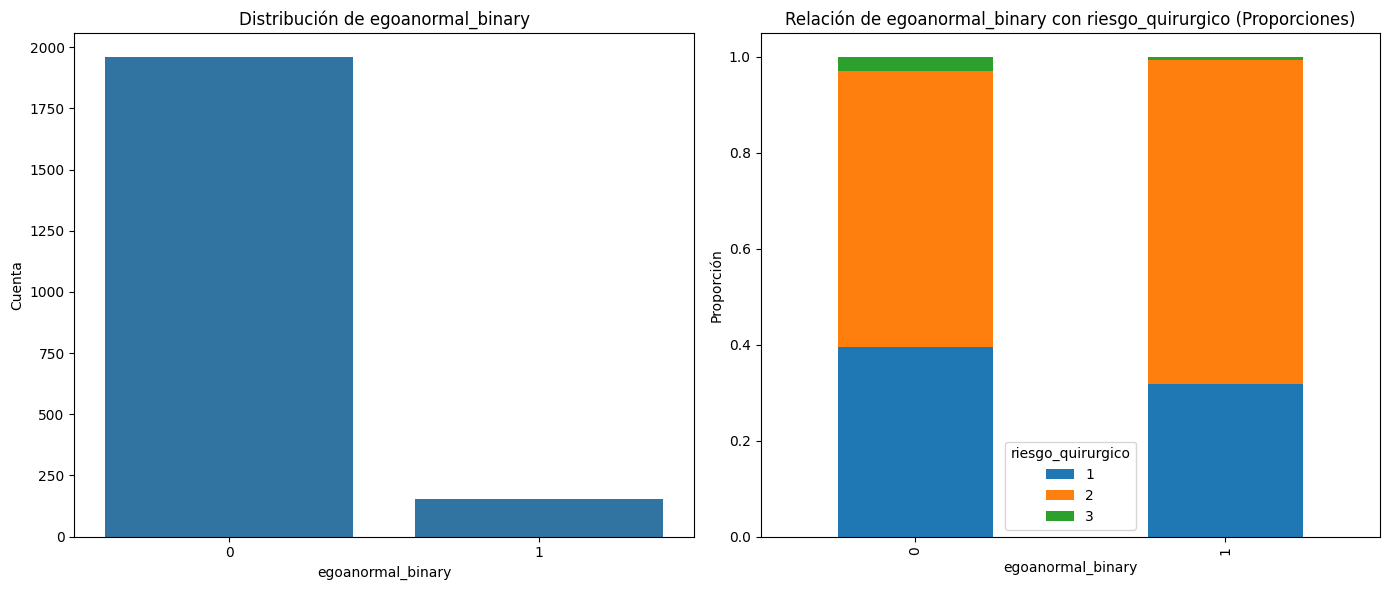

In [ ]:
# Visualización de las variables binarias
for var in binary_vars_entrada:
    plt.figure(figsize=(14, 6))

    # Countplot para ver la distribución de la variable binaria
    plt.subplot(1, 2, 1)
    sns.countplot(x=df[var])
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Cuenta')

    # Gráfico de barras apiladas para ver la relación con la variable de salida
    plt.subplot(1, 2, 2)
    crosstab = pd.crosstab(df[var], df[var_salida[0]], normalize='index')  # Proporción por fila
    crosstab.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Relación de {var} con {var_salida[0]} (Proporciones)')
    plt.xlabel(var)
    plt.ylabel('Proporción')

    plt.tight_layout()
    plt.show()

Visualización de las Variables Binarias:

  * Countplot: para contar las ocurrencias de los valores 0 y 1 (o True/False) en cada variable binaria.
    
  * Crosstab para gráfico de barras apiladas: para calcular la tabla de contingencia entre la variable binaria (var) y la variable de salida (var_salida[0]), normalizando por fila (normalize='index'). Esto genera una proporción de cómo se distribuye cada valor de la variable de salida dentro de cada categoría de la variable binaria.

El gráfico de barras apiladas permite visualizar estas proporciones de forma clara, mostrando, por ejemplo, qué porcentaje de pacientes con "0" o "1" en la variable binaria pertenece a cada categoría de la variable de salida. Este enfoque ofrece una visión más intuitiva y comprensible de la relación entre las variables binarias y la variable de salida.

#### Azar

In [ ]:
# Definir las variables predictoras y la variable objetivo
X = df[num_vars_entrada + binary_vars_entrada]
y = df['riesgo_quirurgico']

In [ ]:
# Generar predicciones aleatorias como en el código original
np.random.seed(42)
y_pred = np.random.randint(1, 4, size=len(y))  # Predicciones entre 1 y 3, correspondientes a las clases de riesgo

In [ ]:
# Calcular la precisión (accuracy) y el F1 score
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average='weighted')

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.33286052009456263
F1 Score: 0.38660930658894593


El código toma un conjunto de datos de variables quirúrgicas y utiliza algunas variables numéricas y binarias como entrada. La variable objetivo es riesgo_quirurgico, que se clasifica en tres categorías (1, 2 y 3). Para evaluar el rendimiento de un modelo, se generan predicciones aleatorias entre las clases de riesgo. Posteriormente, se calculan las métricas de accuracy (precisión) y F1 score ponderado para evaluar la calidad de las predicciones.

**Resumen de los resultados:**

  * Accuracy (precisión): 0.33. Esto significa que el modelo aleatorio predice correctamente alrededor del 33% de los casos, lo cual es esperado en un modelo aleatorio.
  
  * F1 Score ponderado: 0.38. Esta métrica tiene en cuenta tanto la precisión como la exhaustividad del modelo, proporcionando un valor ponderado por las clases. Aunque es mejor que la precisión pura, sigue reflejando la baja calidad de un modelo de predicción aleatoria.

#### Random forest con datos completos

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular la precisión (accuracy) y el F1 Score
accuracy_rf = accuracy_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")

Accuracy: 0.72
F1 Score: 0.70


In [ ]:
# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.76      0.48      0.59       168
           2       0.71      0.90      0.80       249
           3       0.00      0.00      0.00         6

    accuracy                           0.72       423
   macro avg       0.49      0.46      0.46       423
weighted avg       0.72      0.72      0.70       423



**Resumen de los Resultados:**

  1. Accuracy y F1 Score:

    * La exactitud te da una idea del rendimiento general del modelo, pero no considera desequilibrios en las clases.
    
    * El F1 Score, al ser una combinación de precisión y recall, es más útil en casos de clases desbalanceadas o cuando tanto los falsos positivos como los falsos negativos tienen un impacto importante.

  2. Reporte de Clasificación:

    * Proporciona una visión detallada del rendimiento del modelo para cada clase, lo que es útil para entender si hay alguna clase que está siendo clasificada incorrectamente con frecuencia.

In [ ]:
# Obtener las importancias de las características
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Característica': feature_names, 'Importancia': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

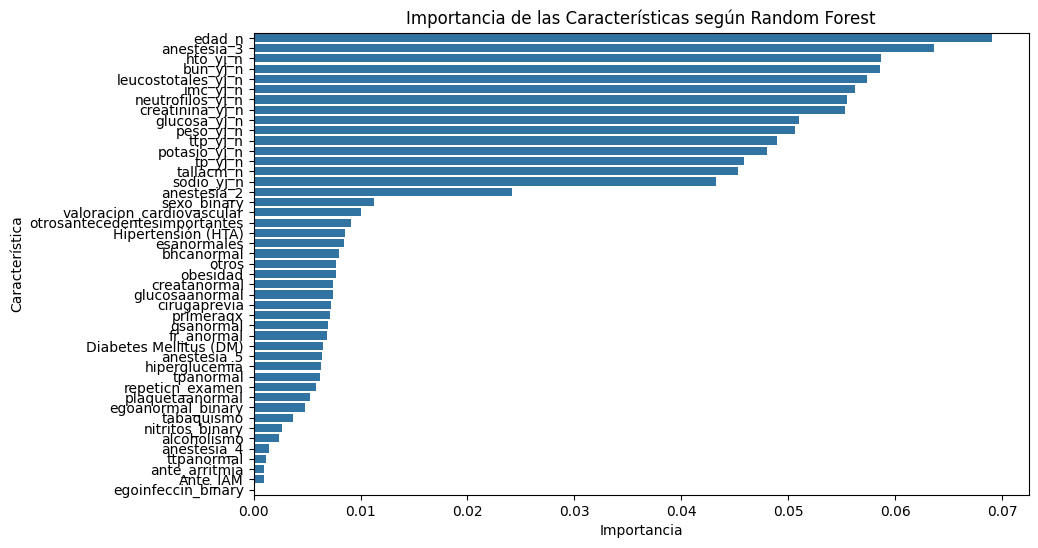

In [ ]:
# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=feature_importance_df)
plt.title('Importancia de las Características según Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

Entrenamos un modelo de Random Forest para predecir la variable de salida (var_salida) usando las características numéricas y binarias.

Extraemos las importancias de las características que nos indican qué variables son más relevantes para hacer predicciones.

Visualizamos estas importancias en un gráfico de barras, lo que facilita interpretar qué características son las más influyentes.

Random Forest nos dará una lista de las características más importantes, basada en la capacidad predictiva.

#### SVM

Para seleccionar las características más relevantes en el modelo, se implementó un enfoque combinado de métodos de selección embedded, wrapper, y filter. Este enfoque permite identificar las variables más importantes para el modelo de forma eficiente y exhaustiva. A continuación se describe el proceso en detalle:

  * Método embedded con Random Forest: Se utilizó el algoritmo de Random Forest para obtener un ranking de importancia de las variables. El Random Forest no sólo es útil para la predicción, sino también para identificar qué características tienen un mayor impacto en el modelo. A partir de los resultados, obtuvimos una lista de las variables ordenadas por su importancia.

  * Método wrapper con selección hacia atrás: Después de identificar las variables importantes con Random Forest, aplicamos un método de selección hacia atrás (backward selection) como un wrapper. Este enfoque permitió iterar sobre el conjunto de características y eliminar progresivamente las menos relevantes, evaluando el rendimiento del modelo en cada iteración para seleccionar el mejor conjunto de características.

En resumen, el uso combinado de estos dos métodos nos permitió seleccionar de manera más robusta y precisa las características más relevantes, tanto numéricas como binarias, optimizando el rendimiento del modelo.

In [ ]:
# Hacer una lista de mayor importancia a menor de las características
vars_importantes = feature_importance_df['Característica'].tolist()

# Mostrar la lista ordenada de características
print("Características ordenadas por importancia:", vars_importantes)

Características ordenadas por importancia: ['edad_n', 'anestesia_3', 'hto_yj_n', 'bun_yj_n', 'leucostotales_yj_n', 'imc_yj_n', 'neutrofilos_yj_n', 'creatinina_yj_n', 'glucosa_yj_n', 'peso_yj_n', 'ttp_yj_n', 'potasio_yj_n', 'tp_yj_n', 'tallacm_n', 'sodio_yj_n', 'anestesia_2', 'sexo_binary', 'valoracion_cardiovascular', 'otrosantecedentesimportantes', 'Hipertensión (HTA)', 'esanormales', 'bhcanormal', 'otros', 'obesidad', 'creatanormal', 'glucosaanormal', 'cirugaprevia', 'primeraqx', 'qsanormal', 'fr_anormal', 'Diabetes Mellitus (DM)', 'anestesia_5', 'hiperglucemia', 'tpanormal', 'repeticn_examen', 'plaquetaanormal', 'egoanormal_binary', 'tabaquismo', 'nitritos_binary', 'alcoholismo', 'anestesia_4', 'ttpanormal', 'ante_arritmia', 'Ante_IAM', 'egoinfeccin_binary']


Para entender mejor cuáles son las características más relevantes para el modelo, es importante no solo listar las características de mayor a menor importancia, sino también visualizarlas y reflexionar sobre su impacto. Las características más importantes para el modelo indican cuáles son los factores clave que influencian las predicciones. Las características más importantes deben ser priorizadas en futuras recolecciones de datos o análisis, ya que parecen tener un impacto significativo en la capacidad del modelo para realizar predicciones precisas.

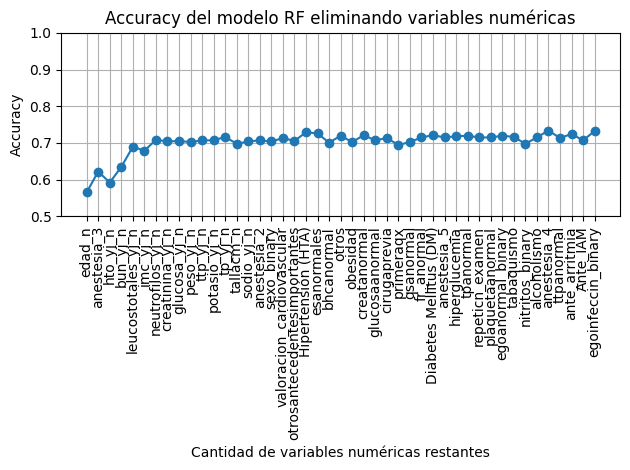

In [ ]:
accuracies = []
model = RandomForestClassifier(random_state=42)
# Iterar sobre el número de variables numéricas importantes en orden descendente
for i in range(len(vars_importantes), 0, -1):
    # Seleccionar las primeras i variables numéricas del conjunto de variables importantes
    num_vars_subset = vars_importantes[:i]

    # Crear un nuevo conjunto de datos con las variables seleccionadas
    selected_vars = num_vars_subset
    X_selected = X[selected_vars]

    # Dividir el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

    # Entrenar el modelo SVM con las variables seleccionadas
    model.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular el accuracy y almacenar el resultado
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Graficar el accuracy a medida que se eliminan variables numéricas
plt.plot(range(len(vars_importantes), 0, -1), accuracies, marker='o')
plt.title("Accuracy del modelo RF eliminando variables numéricas")
plt.xlabel("Cantidad de variables numéricas restantes")
plt.ylabel("Accuracy")

# Ajustar el rango del eje Y (entre 50% y 100%) para centrarse en un rango útil
plt.ylim(0.5, 1)

# Etiquetas en el eje X para mostrar las variables
plt.xticks(range(len(vars_importantes), 0, -1), vars_importantes[::-1], rotation=90)
plt.grid(True)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [ ]:
# Seleccionar las primeras 31
vars_finales_entrada = vars_importantes[:31] #CON EXÁMENES

In [ ]:
# Imprimir la lista seleccionada
print("Características seleccionadas para el análisis:")
print(vars_finales_entrada)

Características seleccionadas para el análisis:
['edad_n', 'anestesia_3', 'hto_yj_n', 'bun_yj_n', 'leucostotales_yj_n', 'imc_yj_n', 'neutrofilos_yj_n', 'creatinina_yj_n', 'glucosa_yj_n', 'peso_yj_n', 'ttp_yj_n', 'potasio_yj_n', 'tp_yj_n', 'tallacm_n', 'sodio_yj_n', 'anestesia_2', 'sexo_binary', 'valoracion_cardiovascular', 'otrosantecedentesimportantes', 'Hipertensión (HTA)', 'esanormales', 'bhcanormal', 'otros', 'obesidad', 'creatanormal', 'glucosaanormal', 'cirugaprevia', 'primeraqx', 'qsanormal', 'fr_anormal', 'Diabetes Mellitus (DM)']


Las 31 características seleccionadas influirán en el análisis de acuerdo con la relevancia que tengan para el modelo en función del problema que estás tratando de resolver. A continuación, explicamos cómo estas características podrían impactar el análisis y las predicciones del modelo:

1. Características Clínicas Generales:

Variables como edad, peso, y talla (tallacm_n) son variables demográficas fundamentales que casi siempre influyen en resultados clínicos o médicos. Estas características suelen ser indicadores importantes del estado general de salud y del riesgo de ciertas enfermedades.

2. Parámetros Bioquímicos y Hematológicos:

Características como creatinina_yj_n, glucosa_yj_n, leucostotales_yj_n, hto_yj_n, potasio_yj_n, y sodio_yj_n son parámetros clave que indican el estado funcional de órganos importantes (riñones, hígado) y del sistema metabólico.

3. Condiciones Médicas Previas:

Las variables que indican enfermedades previas o factores de riesgo como Hipertensión (HTA), Diabetes Mellitus (DM), obesidad, tabaquismo, alcoholismo, y ante_arritmia juegan un papel crucial en predecir el riesgo de complicaciones en pacientes o la probabilidad de que desarrollen nuevas condiciones.

4. Valores Anormales de Exámenes (bioquímicos y otros):

Variables como glucosaanormal, creatanormal, qsanormal, tpanormal, plaquetaanormal, y fr_anormal indican resultados anormales en exámenes de laboratorio, que son señales claras de problemas fisiológicos o potenciales riesgos. Estas variables ayudarán a identificar pacientes con un estado clínico fuera de los rangos normales.

5. Valoración Preoperatoria y Factores Relacionados con Anestesia:

Variables como anestesia_2, anestesia_3, anestesia_5, y valoracion_cardiovascular indican evaluaciones previas al procedimiento quirúrgico y las consideraciones específicas que pueden ser críticas para el manejo del paciente.

6. Otros Antecedentes Médicos:

Variables como otrosantecedentesimportantes, cirugaprevia, primeraqx, Ante_IAM (Infarto Agudo de Miocardio), y repetición de exámenes proporcionan información adicional sobre el historial médico del paciente y su situación médica actual.

Impacto General en el Modelo:

  * Predicciones más precisas: La combinación de estas 31 características te permitirá capturar una amplia variedad de factores que influyen en el estado de salud de los pacientes y su capacidad para recuperarse o sufrir complicaciones.
    
  * Mejora de la generalización del modelo: Al seleccionar variables de múltiples categorías (demográficas, bioquímicas, antecedentes), el modelo podrá generalizar mejor a nuevos pacientes o casos clínicos.
    
  * Reducción de ruido: Al reducir la lista a 31 variables clave, se elimina el exceso de variables que podrían no ser relevantes, mejorando la capacidad del modelo para captar patrones relevantes sin distracciones.

Conclusión:

Estas 31 características proporcionan una visión integral del estado de los pacientes, abordando factores demográficos, bioquímicos, enfermedades crónicas y parámetros quirúrgicos. Esto no solo permitirá hacer predicciones precisas, sino que también ayudará a interpretar los resultados y a tomar decisiones clínicas más informadas. Es un rango adecuado para el análisis, balanceando la cantidad de datos y la relevancia clínica.

In [ ]:
# Seleccionar las primeras 20
vars_finales_entrada_ideal = vars_importantes[:20] #IDEAL

In [ ]:
# Imprimir la lista seleccionada
print("Características seleccionadas ideales:")
print(vars_finales_entrada_ideal)

Características seleccionadas ideales:
['edad_n', 'anestesia_3', 'hto_yj_n', 'bun_yj_n', 'leucostotales_yj_n', 'imc_yj_n', 'neutrofilos_yj_n', 'creatinina_yj_n', 'glucosa_yj_n', 'peso_yj_n', 'ttp_yj_n', 'potasio_yj_n', 'tp_yj_n', 'tallacm_n', 'sodio_yj_n', 'anestesia_2', 'sexo_binary', 'valoracion_cardiovascular', 'otrosantecedentesimportantes', 'Hipertensión (HTA)']


Reducir el análisis a las primeras 20 características sigue siendo una opción viable porque te permite:

  * Concentrar la importancia en las variables más relevantes.

  * Simplificar el modelo sin perder demasiada precisión.

  * Reducir el riesgo de sobreajuste y mejorar la generalización.

  * Mejorar la interpretabilidad y eficiencia computacional.

Si fuera solo por nuestra evaluación preliminar, seleccionaríamos las características hasta Hipertensión (HTA), ya que en ese punto observamos un pico importante en términos de relevancia dentro de las variables. Sin embargo, dado que el objetivo del problema de nuestro problema clasificatorio es el riesgo de los pacientes, consideramos necesario un análisis más profundo que incluya otras variables que puedan influir de manera crítica en el diagnóstico y la predicción del riesgo.

Además, siguiendo la recomendación de la Dra. Patricia, quien subrayó la importancia de evaluar el impacto de los exámenes médicos, creemos que utilizar un conjunto de 31 características es la mejor opción en **esta etapa**. Esto nos permitirá capturar no solo los factores demográficos y clínicos más evidentes, sino también los resultados de pruebas de laboratorio y exámenes que podrían revelar patrones subyacentes en el estado de salud de los pacientes.

De este modo, podemos obtener una imagen más completa y detallada del riesgo de los pacientes, lo que será fundamental para ajustar el modelo gradualmente y optimizar su rendimiento sin perder de vista los factores clave relacionados con el diagnóstico médico.

Este enfoque integral asegura que estamos utilizando las características más relevantes en el modelo, mejorando su capacidad predictiva y asegurando que el conjunto de variables sea lo más eficiente posible para el problema en cuestión.

In [ ]:
# Crear un nuevo conjunto de datos con las variables seleccionadas
X_selected = X[vars_finales_entrada_ideal]

# Dividir el conjunto de datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Inicializar y entrenar el modelo SVM
model = SVC()
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el accuracy del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6882


In [ ]:
# Crear un nuevo conjunto de datos con las variables seleccionadas
X_selected = X[vars_finales_entrada]

# Dividir el conjunto de datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Inicializar y entrenar el modelo SVM
model = SVC()
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el accuracy del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6913


El proceso de selección de variables y la evaluación del modelo son fundamentales para identificar qué subconjuntos de características son más útiles para la predicción. La decisión de utilizar 31 variables se basa en la necesidad de capturar un conjunto amplio de factores relevantes, incluyendo tanto características clínicas como resultados de exámenes médicos, sin introducir demasiada complejidad en el modelo. Este número permite encontrar un equilibrio adecuado entre la representatividad de los datos y la simplicidad del modelo.

Al seleccionar estas 31 características, se reduce la complejidad del modelo en comparación con usar todas las variables disponibles, lo que puede mejorar su interpretabilidad y eficiencia computacional. Al mismo tiempo, este número es suficiente para abarcar los factores críticos que impactan directamente en las predicciones del riesgo. Si el accuracy obtenido con este subconjunto es satisfactorio, se puede concluir que la selección es adecuada para lograr un modelo preciso y eficiente. Por otro lado, si el accuracy es bajo, será necesario ajustar las variables seleccionadas, los hiperparámetros del modelo SVM, o incluso reconsiderar las características seleccionadas para mejorar el rendimiento.

El análisis de estas variables clave, junto con la evaluación del rendimiento del modelo, guiará las decisiones sobre cómo simplificar o ajustar el modelo. Así, se optimiza la eficiencia del proceso de clasificación, manteniendo un alto nivel de precisión en las predicciones, lo que justifica plenamente la selección de este subconjunto de 31 variables.

In [ ]:
# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

Exactitud del modelo SVM: 0.65
Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.86      0.18      0.30       168
           2       0.63      0.98      0.77       249
           3       0.00      0.00      0.00         6

    accuracy                           0.65       423
   macro avg       0.50      0.39      0.35       423
weighted avg       0.71      0.65      0.57       423



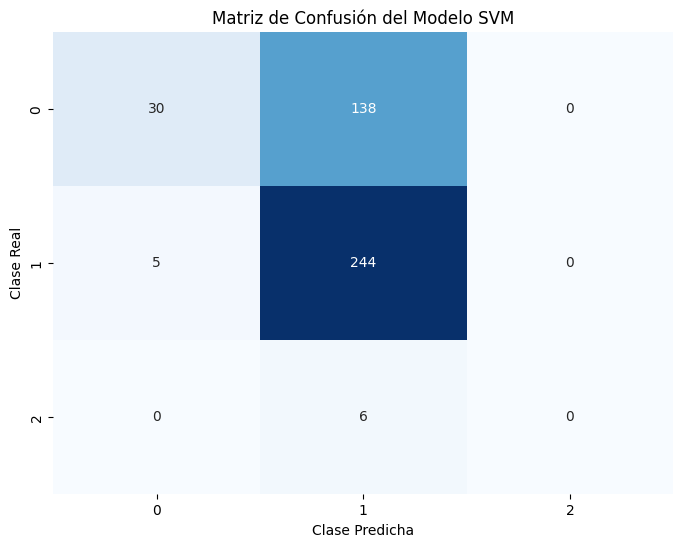

In [ ]:
# Crear un clasificador SVM con kernel lineal
svm_model = SVC(kernel='linear', random_state=42)

# Entrenar el modelo SVM con los datos escalados
svm_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Mostrar los resultados
print(f"Exactitud del modelo SVM: {accuracy:.2f}")
print("Reporte de clasificación:")
print(report)

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusión del Modelo SVM")
plt.ylabel("Clase Real")
plt.xlabel("Clase Predicha")
plt.show()

**Resumen de los Resultados:**

  * Exactitud (Accuracy):
      La exactitud indica qué tan bien el modelo clasificó correctamente las muestras en el conjunto de prueba. Un valor cercano a 1.0 (100%) indica un buen rendimiento.

  * Reporte de Clasificación:
      * El reporte de clasificación proporciona más detalles sobre el rendimiento del modelo, desglosando la precisión, recall, y F1-Score para cada clase.
        
      * Precisión: Mide cuántas de las instancias clasificadas como una clase específica realmente pertenecen a esa clase.
      
      * Recall: Indica cuántas de las instancias verdaderas de una clase fueron correctamente identificadas por el modelo.
      
      * F1-Score: Es una métrica que combina la precisión y el recall en una sola métrica armónica.

  * Matriz de Confusión:
      * La matriz de confusión muestra la distribución de las clasificaciones correctas e incorrectas.

      * Las celdas diagonales representan las predicciones correctas, mientras que las celdas fuera de la diagonal representan los errores de clasificación. Una matriz con valores altos en la diagonal indica un buen rendimiento.

Este enfoque con SVM y escalado de datos mejora el rendimiento del modelo y proporciona una evaluación más completa mediante el uso de métricas adicionales y la matriz de confusión. La combinación de precisión, recall, F1-Score y la exactitud ofrece una visión más profunda del rendimiento del modelo en clasificación multiclase.

#### ¿Se puede determinar la importancia de las características para el modelo generado? Recuerden que incluir características irrelevantes puede afectar negativamente el rendimiento del modelo y aumentar la complejidad sin beneficios sustanciales.


Importancia de las características en el modelo SVM lineal:
anestesia_3                     2.148313
bun_yj_n                        0.317994
anestesia_2                     0.285445
edad_n                          0.238964
peso_yj_n                       0.235142
fr_anormal                      0.146416
hto_yj_n                        0.143747
bhcanormal                      0.131271
potasio_yj_n                    0.117739
qsanormal                       0.116864
sodio_yj_n                      0.089751
esanormales                     0.070591
obesidad                        0.065463
creatanormal                    0.063211
leucostotales_yj_n              0.062753
cirugaprevia                    0.056020
Diabetes Mellitus (DM)          0.055938
sexo_binary                     0.053310
primeraqx                       0.036326
imc_yj_n                        0.035602
glucosaanormal                  0.033634
otros                           0.030245
Hipertensión (HTA)              0.024

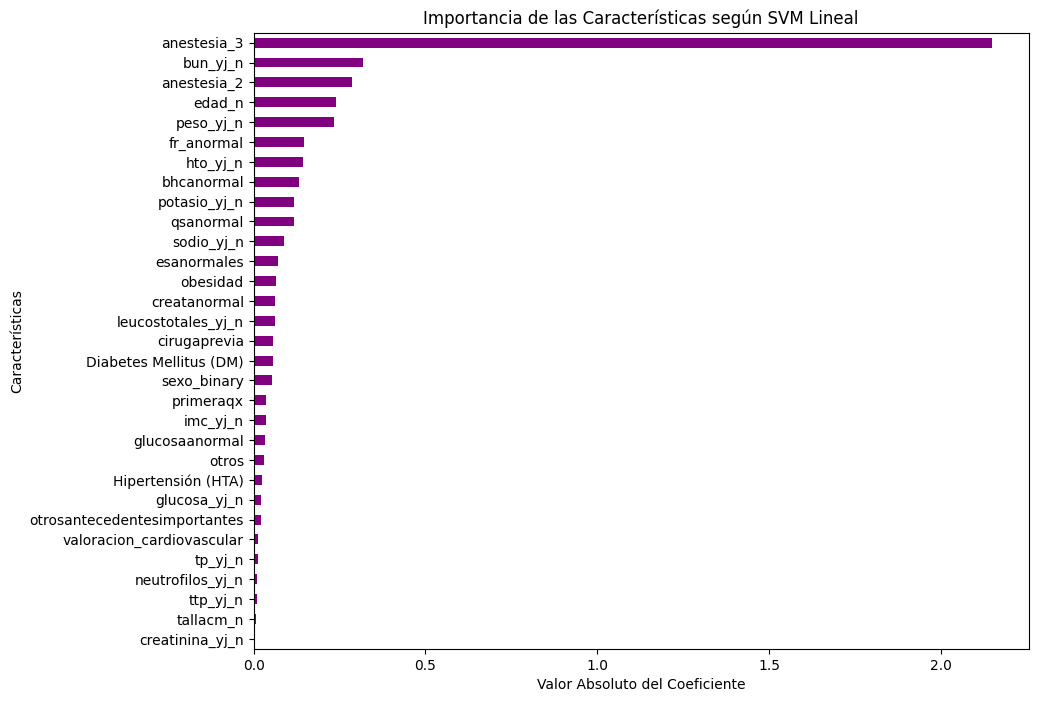

In [ ]:
# Extraer los coeficientes del modelo SVM (kernel lineal)
coef = np.abs(svm_model.coef_[0])  # Obtener los coeficientes absolutos
feature_importance = pd.Series(coef, index=X_selected.columns).sort_values(ascending=False)

# Mostrar las importancias de las características
print("\nImportancia de las características en el modelo SVM lineal:")
print(feature_importance)

# Visualización de la importancia de las características
plt.figure(figsize=(10, 8))
feature_importance.plot(kind='barh', color='purple')
plt.title('Importancia de las Características según SVM Lineal')
plt.xlabel('Valor Absoluto del Coeficiente')
plt.ylabel('Características')
plt.gca().invert_yaxis()
plt.show()

**Resumen de los Resultados:**

  * Exactitud del Modelo: Muestra qué tan preciso fue el modelo en el conjunto de prueba, calculando el porcentaje de predicciones correctas.
  
  * Importancia de las Características: El modelo SVM lineal asigna coeficientes a cada característica, que indican qué tan influyente es cada una en la clasificación.
  
  * Gráfico de Importancia: Se visualizan las características ordenadas por su influencia en la clasificación, lo que permite identificar qué variables son las más relevantes y cuáles podrían ser irrelevantes o redundantes.

Este código nos permite no solo entrenar y evaluar un modelo SVM lineal, sino también determinar la importancia de las características basándote en los coeficientes del modelo. Esto es crucial para reducir la complejidad del modelo, eliminar características irrelevantes y mejorar el rendimiento general al enfocarse en las variables más importantes.

#### ¿El modelo está sub/sobreajustando los datos de entrenamiento?

In [ ]:
# Inicializar el modelo SVM con kernel lineal
svm_model = SVC(kernel='linear', random_state=42)

# Definir el rango de tamaños de entrenamiento para las curvas de aprendizaje
train_sizes = np.linspace(0.1, 1.0, 10) # Proporción de los datos de entrenamiento usados

# Obtener las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(svm_model, X_train, y_train, train_sizes=train_sizes, cv=5)

# Calcular las medias y desviaciones estándar de las puntuaciones en los conjuntos de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

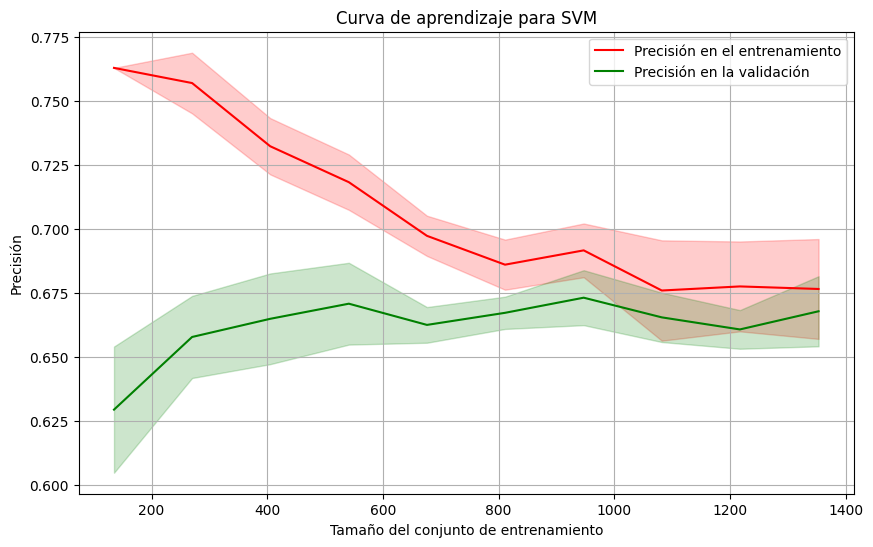

In [ ]:
# Graficar las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Precisión en el entrenamiento", color="r")
plt.plot(train_sizes, test_mean, label="Precisión en la validación", color="g")

# Sombreados para la desviación estándar
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.2)

# Etiquetas y título
plt.title("Curva de aprendizaje para SVM")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.legend(loc="best")
plt.grid(True)
plt.show()

### ¿El modelo está sub/sobreajustando los datos de entrenamiento?

A partir de la curva de aprendizaje para SVM que se muestra en la gráfica, podemos sacar las siguientes conclusiones sobre el ajuste del modelo en los datos de entrenamiento:

1. Diferencia entre entrenamiento y validación:

  * La línea roja (precisión en el entrenamiento) comienza con un valor alto y disminuye a medida que aumenta el tamaño del conjunto de entrenamiento, estabilizándose cerca de un valor alrededor de 0.725.
    
  * La línea verde (precisión en la validación) comienza mucho más baja (alrededor de 0.625) y lentamente mejora conforme crece el conjunto de entrenamiento, estabilizándose cerca de 0.68.

2. Análisis del Subajuste/Sobreajuste:

  * Sobreajuste: Un modelo sobreajustado (overfitting) se caracteriza por tener una alta precisión en el conjunto de entrenamiento y una baja precisión en el conjunto de validación. En este caso, aunque la precisión en el entrenamiento es inicialmente alta, disminuye rápidamente a medida que el tamaño del conjunto aumenta. Además, la diferencia entre las curvas de entrenamiento y validación no es muy pronunciada al final. Esto sugiere que el modelo no está sobreajustando gravemente.
    
  * Subajuste: Un modelo subajustado (underfitting) generalmente tendrá una baja precisión tanto en el entrenamiento como en la validación. En este caso, aunque la precisión en la validación es relativamente baja (alrededor de 0.68), no es extremadamente baja. Sin embargo, la precisión en ambos conjuntos se estabiliza en valores moderados, lo que indica que el modelo podría estar subajustando ligeramente, ya que no alcanza una precisión óptima en ninguno de los conjuntos.

3. Conclusión:

  * El modelo parece estar ligeramente subajustado. La precisión en la validación es significativamente más baja que en el entrenamiento, pero la diferencia no es extrema. Esto indica que el modelo podría beneficiarse de ajustes adicionales para mejorar su capacidad de generalización. Algunos posibles ajustes incluyen modificar los hiperparámetros del SVM, como el valor de C o el tipo de kernel, o probar con más características o preprocesamiento de los datos.

In [ ]:
# Evaluar el modelo con el conjunto de prueba
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Reporte de clasificación y precisión
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Exactitud del modelo SVM en el conjunto de prueba: {accuracy:.2f}")
print("Reporte de clasificación:")
print(report)

Exactitud del modelo SVM en el conjunto de prueba: 0.65
Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.86      0.18      0.30       168
           2       0.63      0.98      0.77       249
           3       0.00      0.00      0.00         6

    accuracy                           0.65       423
   macro avg       0.50      0.39      0.35       423
weighted avg       0.71      0.65      0.57       423



El modelo SVM muestra un rendimiento razonable en términos de exactitud general, pero su desempeño es muy desigual entre clases. La clase 2 es la mejor clasificada, con un buen balance entre precisión y recall, mientras que la clase 1 presenta problemas significativos de recall (no detecta la mayoría de los casos), y la clase 3 no es identificada en absoluto. Esto sugiere que el modelo está sesgado hacia la clase 2, probablemente debido al desbalance en el número de casos entre clases. Es necesario realizar ajustes adicionales, como balanceo de clases o ajuste de hiperparámetros, para mejorar la capacidad del modelo en las clases minoritarias.

#### ¿Cuál es la métrica adecuada para este problema de negocio?

La elección de la métrica adecuada depende del contexto específico del problema de negocio y debe estar alineada con los objetivos principales del análisis. En este caso, el problema de negocio clave es conocer el riesgo preoperatorio de los pacientes, lo que tiene implicaciones críticas para la toma de decisiones clínicas. Por lo tanto, es fundamental elegir una métrica que no solo mida el rendimiento general del modelo, sino que también capture correctamente tanto los verdaderos positivos como los falsos negativos, especialmente si las clases están desbalanceadas.

### F1-Score: La Métrica Elegida

La métrica F1-Score se alinea directamente con los objetivos de este problema, ya que balancea las dos métricas críticas en problemas de clasificación: precisión (proporción de verdaderos positivos sobre todos los predichos como positivos) y recall (proporción de verdaderos positivos sobre todos los que realmente son positivos). Esta métrica es particularmente útil en situaciones donde no se puede priorizar uno sobre el otro y se necesita un compromiso equilibrado entre ambos.

  * Definición: El F1-Score es la media armónica entre la precisión y el recall, lo que la hace más adecuada que la accuracy en situaciones donde las clases están desbalanceadas, es decir, cuando algunas clases de riesgo preoperatorio ocurren con mayor frecuencia que otras.

  * Cuándo usarlo: Es crucial utilizar F1-Score cuando tanto los falsos positivos como los falsos negativos tienen implicaciones significativas para el negocio. En este caso, el problema de negocio consiste en identificar correctamente el riesgo preoperatorio, por lo que no solo es importante detectar a los pacientes con alto riesgo, sino también evitar clasificar incorrectamente a aquellos sin riesgo significativo, ya que esto podría derivar en consecuencias clínicas no deseadas.

#### Ejemplo de Aplicación en Clasificación de Riesgo Preoperatorio

En el contexto de este modelo de clasificación de riesgo preoperatorio, el F1-Score es una métrica particularmente adecuada. Si el modelo predice incorrectamente que un paciente tiene alto riesgo (falso positivo), esto podría llevar a procedimientos innecesarios o intervenciones costosas. Por otro lado, un falso negativo (no detectar el riesgo cuando realmente existe) podría tener consecuencias graves para el paciente. Por ello, se necesita un equilibrio entre ambos errores, que es precisamente lo que proporciona el F1-Score.

### Comparación con Otras Métricas

  * Accuracy (Exactitud): Si bien la accuracy mide la proporción de predicciones correctas sobre el total, esta métrica no es suficiente en casos donde las clases están desbalanceadas. Un alto valor de accuracy podría ser engañoso si el modelo está sesgado hacia la clase mayoritaria de pacientes con bajo riesgo, omitiendo los casos críticos de alto riesgo.

  * Precision (Precisión): La precisión es importante en situaciones donde el costo de los falsos positivos es alto, es decir, cuando queremos asegurarnos de que los pacientes identificados como de alto riesgo realmente lo sean. Sin embargo, priorizar solo la precisión podría dejar de lado muchos verdaderos positivos (falsos negativos), lo cual es inaceptable en este contexto.

  * Recall (Sensibilidad o Exhaustividad): El recall es crucial en situaciones donde el costo de los falsos negativos es más alto, como en el caso de no detectar correctamente a pacientes con alto riesgo preoperatorio. No obstante, enfocarse solo en el recall podría llevar a una alta tasa de falsos positivos, clasificando erróneamente a pacientes sin riesgo como de alto riesgo.

### Justificación del **F1-Score**

Dado que este es un problema de clasificación del riesgo preoperatorio con clases que pueden estar desbalanceadas, el F1-Score es la métrica más adecuada para medir el rendimiento del modelo. Nos asegura que tanto la precisión como el recall se consideren de manera equilibrada, lo que es crucial para tomar decisiones clínicas seguras y eficaces. El F1-Score es más confiable que la accuracy en este tipo de problemas, ya que evita el sesgo hacia la clase mayoritaria y garantiza que se identifiquen correctamente los casos de alto riesgo.

#### ¿Cuál debería ser el desempeño mínimo a obtener?

In [ ]:
# Validación cruzada con F1 Score promedio
f1_cv = cross_val_score(rf_model, X, y, cv=5, scoring='f1_weighted')
print(f"F1 Score (validación cruzada): {f1_cv.mean():.2f} (+/- {f1_cv.std():.2f})")

F1 Score (validación cruzada): 0.67 (+/- 0.03)


### Resumen de los Resultados:

  * F1 Score de 0.67: El valor promedio del F1-Score obtenido después de realizar la validación cruzada es de 0.67. El F1-Score es una métrica que balancea precisión y recall, lo que significa que el modelo logra un rendimiento moderado en términos de clasificación, capturando correctamente tanto los verdaderos positivos como evitando los falsos negativos. Un valor de 0.67 indica que el modelo tiene un desempeño razonable, aunque podría mejorar.

  * Validación cruzada: Este valor de F1-Score se ha obtenido mediante validación cruzada, lo que implica que el modelo fue entrenado y evaluado en múltiples particiones del conjunto de datos (generalmente en diferentes "folds"). Este método se utiliza para tener una estimación más robusta del rendimiento del modelo y para evaluar su capacidad de generalización a nuevos datos.

  * (+/- 0.03): Este valor representa la desviación estándar del F1-Score a lo largo de los diferentes conjuntos de validación. En este caso, la desviación estándar es de 0.03, lo que significa que las variaciones del F1-Score entre los diferentes pliegues de la validación cruzada son pequeñas. Un valor bajo de desviación estándar, como este, indica que el modelo tiene un comportamiento consistente en los diferentes subconjuntos de datos, lo que es una buena señal de que el modelo es estable y generaliza bien.

### En resumen:

  * El modelo tiene un F1-Score promedio de 0.67, lo cual es un resultado razonable.
    
  * La variación en el rendimiento entre diferentes pliegues de validación cruzada es pequeña (±0.03), lo que sugiere que el modelo tiene un rendimiento estable.
    
  * Sin embargo, un F1-Score de 0.67 puede ser una señal de que el modelo aún tiene margen para mejorar en términos de balancear precisión y recall, especialmente si la importancia de los falsos positivos y falsos negativos es crítica para el problema.

El problema que estamos abordando es un problema de clasificación, cuyo objetivo es estimar el riesgo asociado a ciertos factores clínicos. Dado que se trata de un problema nuevo, no contamos con un benchmark histórico directo para comparar el rendimiento del modelo. Sin embargo, podemos establecer un punto de referencia inicial al comparar nuestro modelo con otros algoritmos similares de clasificación y basarnos en métricas clave para evaluar si el rendimiento es aceptable.

El modelo baseline seleccionado para este problema es Máquinas de Soporte Vectorial (**SVM**), que es reconocido por su capacidad para manejar problemas de clasificación complejos, especialmente en aquellos con múltiples factores que permiten una buena separación entre clases. A continuación, se detallan algunas métricas y pautas generales a considerar para evaluar el rendimiento:

  * Exactitud (Accuracy): Un valor aceptable de exactitud dependerá de lo que se espera en términos de rendimiento en este problema de clasificación de riesgo preoperatorio. Un desempeño en el rango de 70%-80% o más sería un buen punto de partida para considerar que el modelo está alcanzando niveles aceptables. Sin embargo, la accuracy por sí sola puede no ser suficiente si los factores preoperatorios que se evalúan están desbalanceados entre las clases, por lo que es importante complementarla con otras métricas.

  * **F1-Score**: El F1-Score balancea precisión y recall, lo cual es crucial en problemas de clasificación del riesgo preoperatorio, ya que es importante minimizar tanto los falsos positivos (riesgo alto incorrectamente predicho) como los falsos negativos (riesgo bajo mal clasificado). Un F1-Score en el rango de 0.70 a 0.80 sería un buen indicador de que el modelo está capturando correctamente el equilibrio entre los distintos tipos de errores. Si el F1-Score es bajo (por debajo de 0.5), podría indicar que el modelo no está logrando un buen balance al clasificar los riesgos basados en los factores preoperatorios.

  * Validación Cruzada: La validación cruzada proporciona una estimación más confiable del rendimiento generalizado del modelo. Si el F1-Score obtenido mediante validación cruzada es consistente en el rango de 0.70 a 0.80 (o más), con una baja desviación estándar, esto sería una señal de que el modelo SVM generaliza bien y es adecuado para este problema de clasificación del riesgo preoperatorio.

Dado que no existe un benchmark histórico previo con el cual comparar directamente, las métricas clave como el F1-Score y la accuracy son fundamentales para establecer un desempeño mínimo aceptable. Además, la comparación con otros algoritmos baseline, como Naive Bayes, Árboles de Decisión y Regresión Logística, nos permitirá evaluar si nuestro modelo SVM está alcanzando un nivel de rendimiento adecuado al estimar el riesgo basado en los factores preoperatorios, o si requiere mayor optimización.

### Conclusión

Este avance se enfoca en la construcción de un modelo de referencia (baseline) utilizando modelos individuales (como Random Forest o SVM), en lugar de ensambles o métodos más sofisticados. El propósito de este baseline es proporcionar una evaluación inicial de la viabilidad del problema y medir qué tan bien los datos permiten predecir la variable objetivo.

El baseline es esencial por varias razones:

  1. Evaluar la dificultad del problema:

      Si el rendimiento del baseline es similar al azar o muy bajo, podría indicar que el problema es inherentemente difícil o que los datos disponibles no contienen suficiente información para hacer predicciones precisas. En estos casos, puede ser necesario obtener más datos o realizar más ingeniería de características para mejorar el rendimiento.

  2. Establecer un punto de referencia:

      Si el baseline tiene un rendimiento razonable o aceptable, incluso un modelo simple puede ser una solución mínima viable para el problema, mostrando que hay potencial para mejorar con enfoques más avanzados. Este resultado es particularmente útil cuando el simple modelo ya puede aportar valor en aplicaciones del negocio.

  3. Gestión de expectativas:
        
      El baseline ayuda a gestionar las expectativas, tanto del equipo de desarrollo como de los stakeholders, ya que proporciona una línea base de lo que se puede lograr con métodos simples. Esto permite tener una idea clara de los resultados posibles antes de invertir tiempo y recursos en enfoques más complejos y costosos.

  4. Guía para mejorar el rendimiento:
      
      Si el modelo baseline demuestra ser prometedor, este proporciona una base de comparación para futuras mejoras. Cualquier modelo más avanzado debe mejorar significativamente el rendimiento del baseline para justificar su uso.

En resumen, la construcción del modelo baseline facilita la evaluación temprana del problema y permite ajustar las expectativas de los resultados que se pueden esperar. Si el baseline es exitoso, puede servir como una solución mínima aceptable o como un punto de partida para desarrollar modelos más complejos que puedan optimizar aún más el rendimiento en escenarios de negocio más exigentes.